In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, linalg
import os
import sys

In [2]:
predictors = ['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row','kurtosis']
df_out = pd.read_excel(os.path.join('C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_sdeDavid_without_outlires.xlsx')).iloc[: , 1:]
#df_out = pd.read_excel(os.path.join('C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_without_outlires.xlsx')).iloc[: , 1:]
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type                    763 non-null    object 
 1   Plot                    763 non-null    object 
 2   Site_Name               763 non-null    object 
 3   mean                    763 non-null    float64
 4   min                     763 non-null    float64
 5   prctile5                763 non-null    float64
 6   max                     763 non-null    float64
 7   prctile95               763 non-null    float64
 8   std                     763 non-null    float64
 9   MTD                     763 non-null    float64
 10  median                  763 non-null    float64
 11  skewness                763 non-null    float64
 12  kurtosis                763 non-null    float64
 13  IQR                     763 non-null    float64
 14  MAD                     763 non-null    fl

# Correlation

## Pearson Full Correlation

In [3]:
def correlations(data,threshold,dataset_name):
    print(data.info())
    sns.set(font_scale=2)
    plt.figure(figsize=(30,20))
    correlations = data.corr()
     # Count pairs with correlation above threshold
    print(len(correlations))
    high_corr_pairs = ((correlations.abs() > 0.7)).sum().sum() -len(correlations)
    print(high_corr_pairs/2)
    sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
                annot_kws={"size": 15}, vmin=-1, vmax=1).set_title(dataset_name+' - Unordered correlation matrix',fontsize=50)

    from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
    from scipy.spatial.distance import squareform
    sns.set_style("whitegrid")

    # plt.figure(figsize=(12,5))
    dissimilarity = 1 - abs(correlations)
    Z = linkage(squareform(dissimilarity), 'complete')
    f, ax =plt.subplots(1, 1,figsize=(15,6))
    ax.title.set_text(dataset_name+' - Dendrogram of the Hierarchical Clustering')
    dendrogram(Z, labels=data.columns,ax=ax, orientation='top',
               leaf_rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    # Clusterize the data
    labels = fcluster(Z, threshold, criterion='distance')

    # Show the cluster
    import numpy as np

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(data[i])
        else:
            df_to_append = pd.DataFrame(data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
    plt.figure(figsize=(30,20))
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
                annot_kws={"size": 15}, vmin=-1, vmax=1).set_title(dataset_name+' - Ordered correlation matrix according to threshold',fontsize=50)
    sns.set(font_scale=2)
    g = sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
                   annot_kws={"size": 15}, vmin=-1, vmax=1, figsize=(30,25)).fig.suptitle(dataset_name+' - Ordered correlation matrix with the Dendrogram',fontsize=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean                    763 non-null    float64
 1   median                  763 non-null    float64
 2   prctile33               763 non-null    float64
 3   min                     763 non-null    float64
 4   prctile5                763 non-null    float64
 5   max                     763 non-null    float64
 6   prctile95               763 non-null    float64
 7   std                     763 non-null    float64
 8   MAD                     763 non-null    float64
 9   skewness                763 non-null    float64
 10  IQR                     763 non-null    float64
 11  MTD                     763 non-null    float64
 12  meanci_1                763 non-null    float64
 13  meanci_2                763 non-null    float64
 14  Diff_median_of_plot     763 non-null    fl

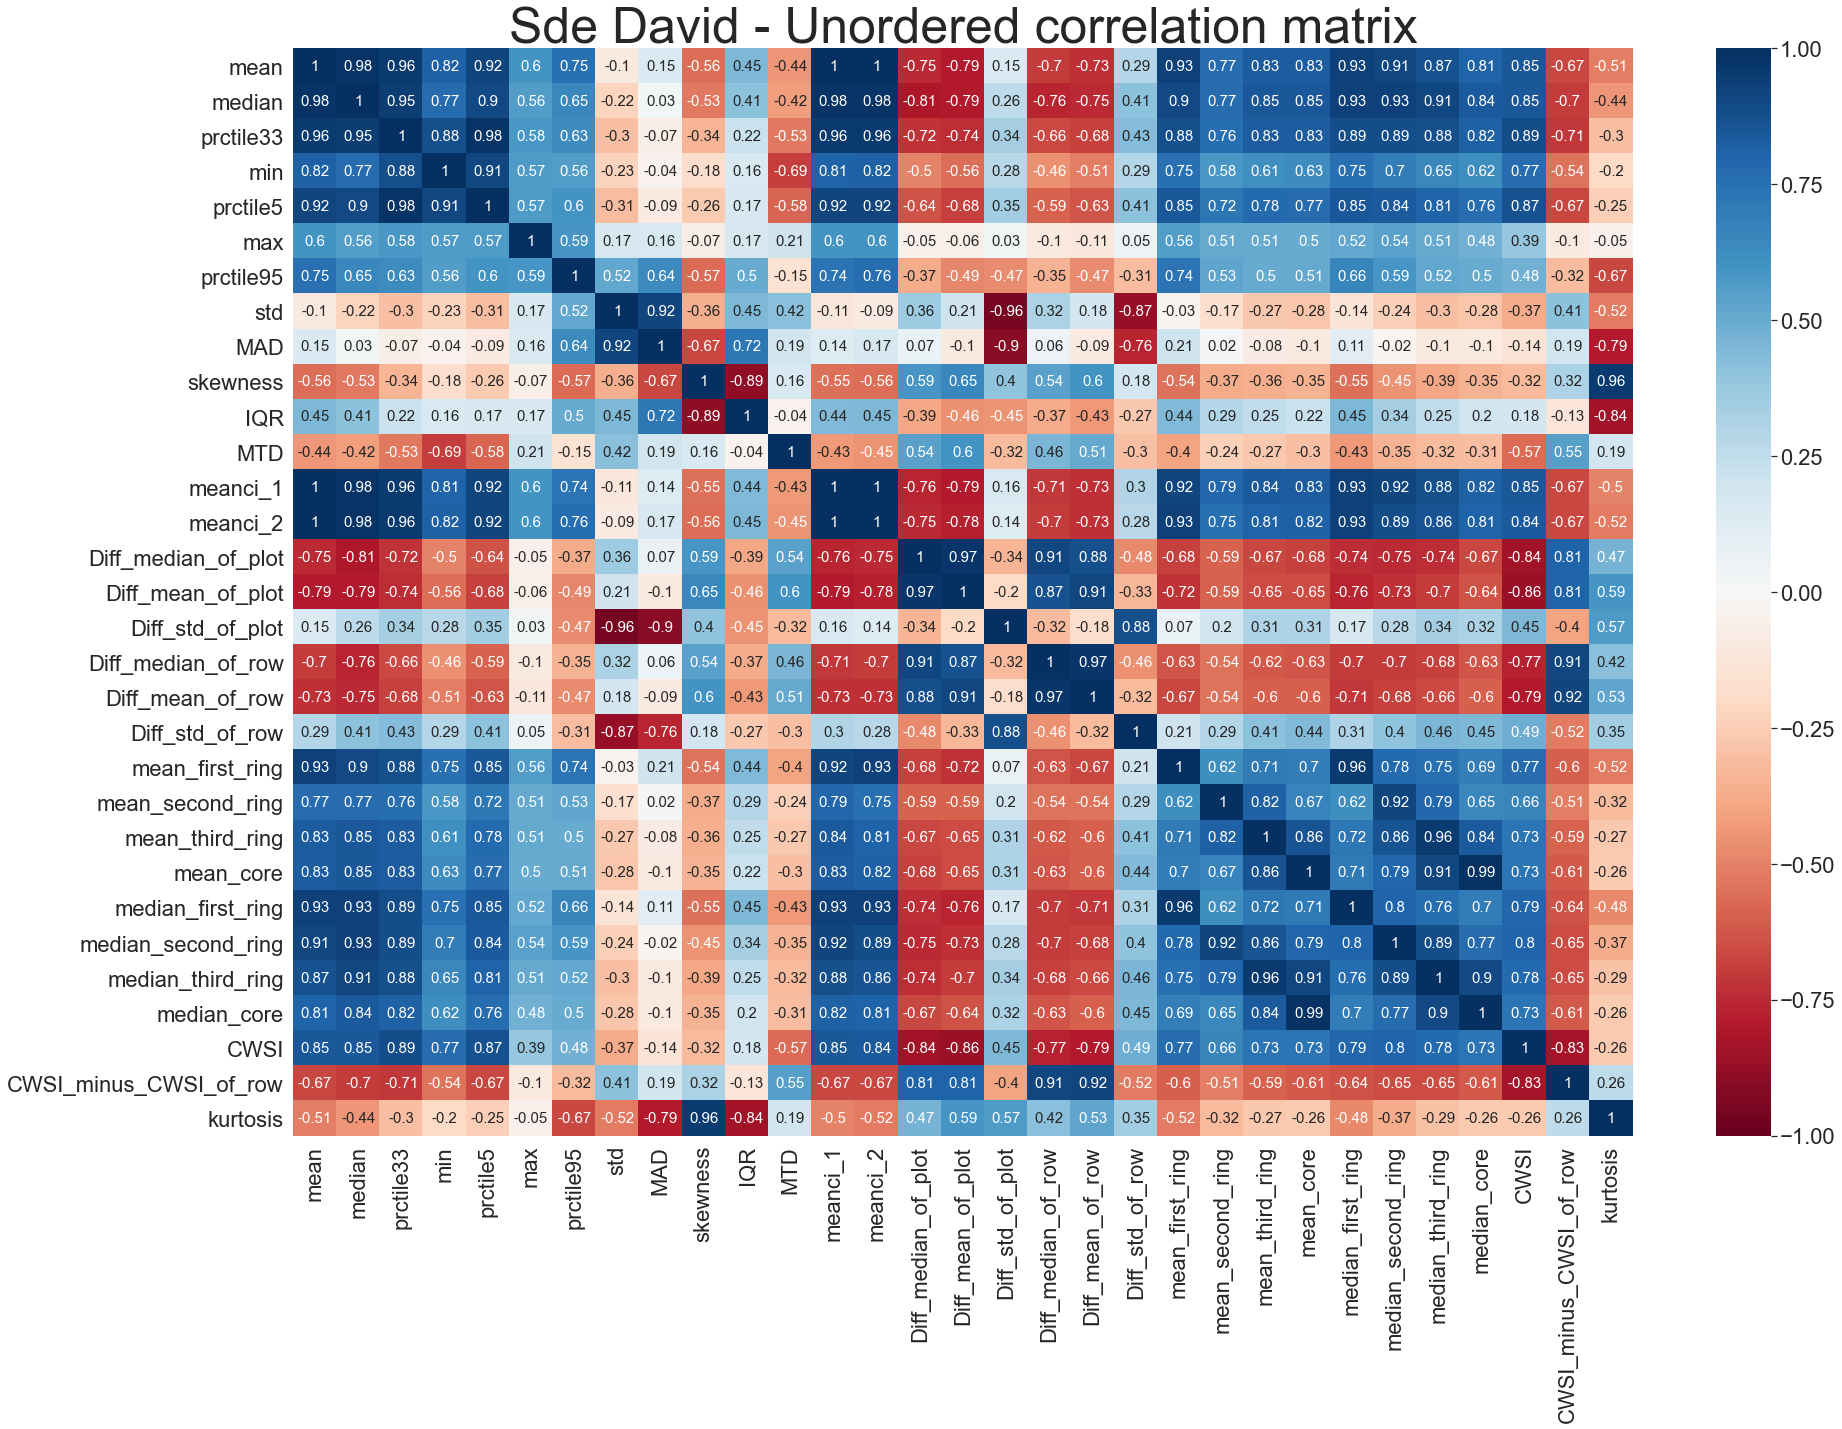

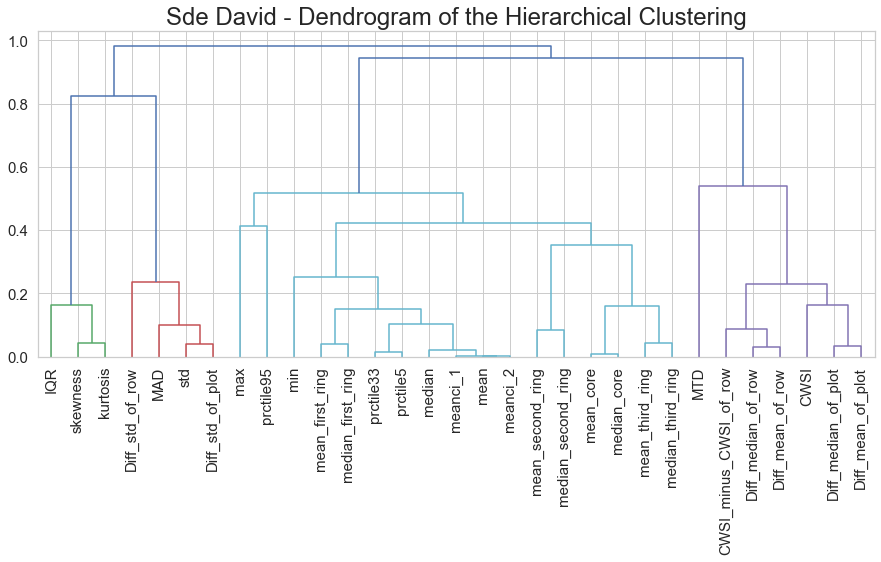

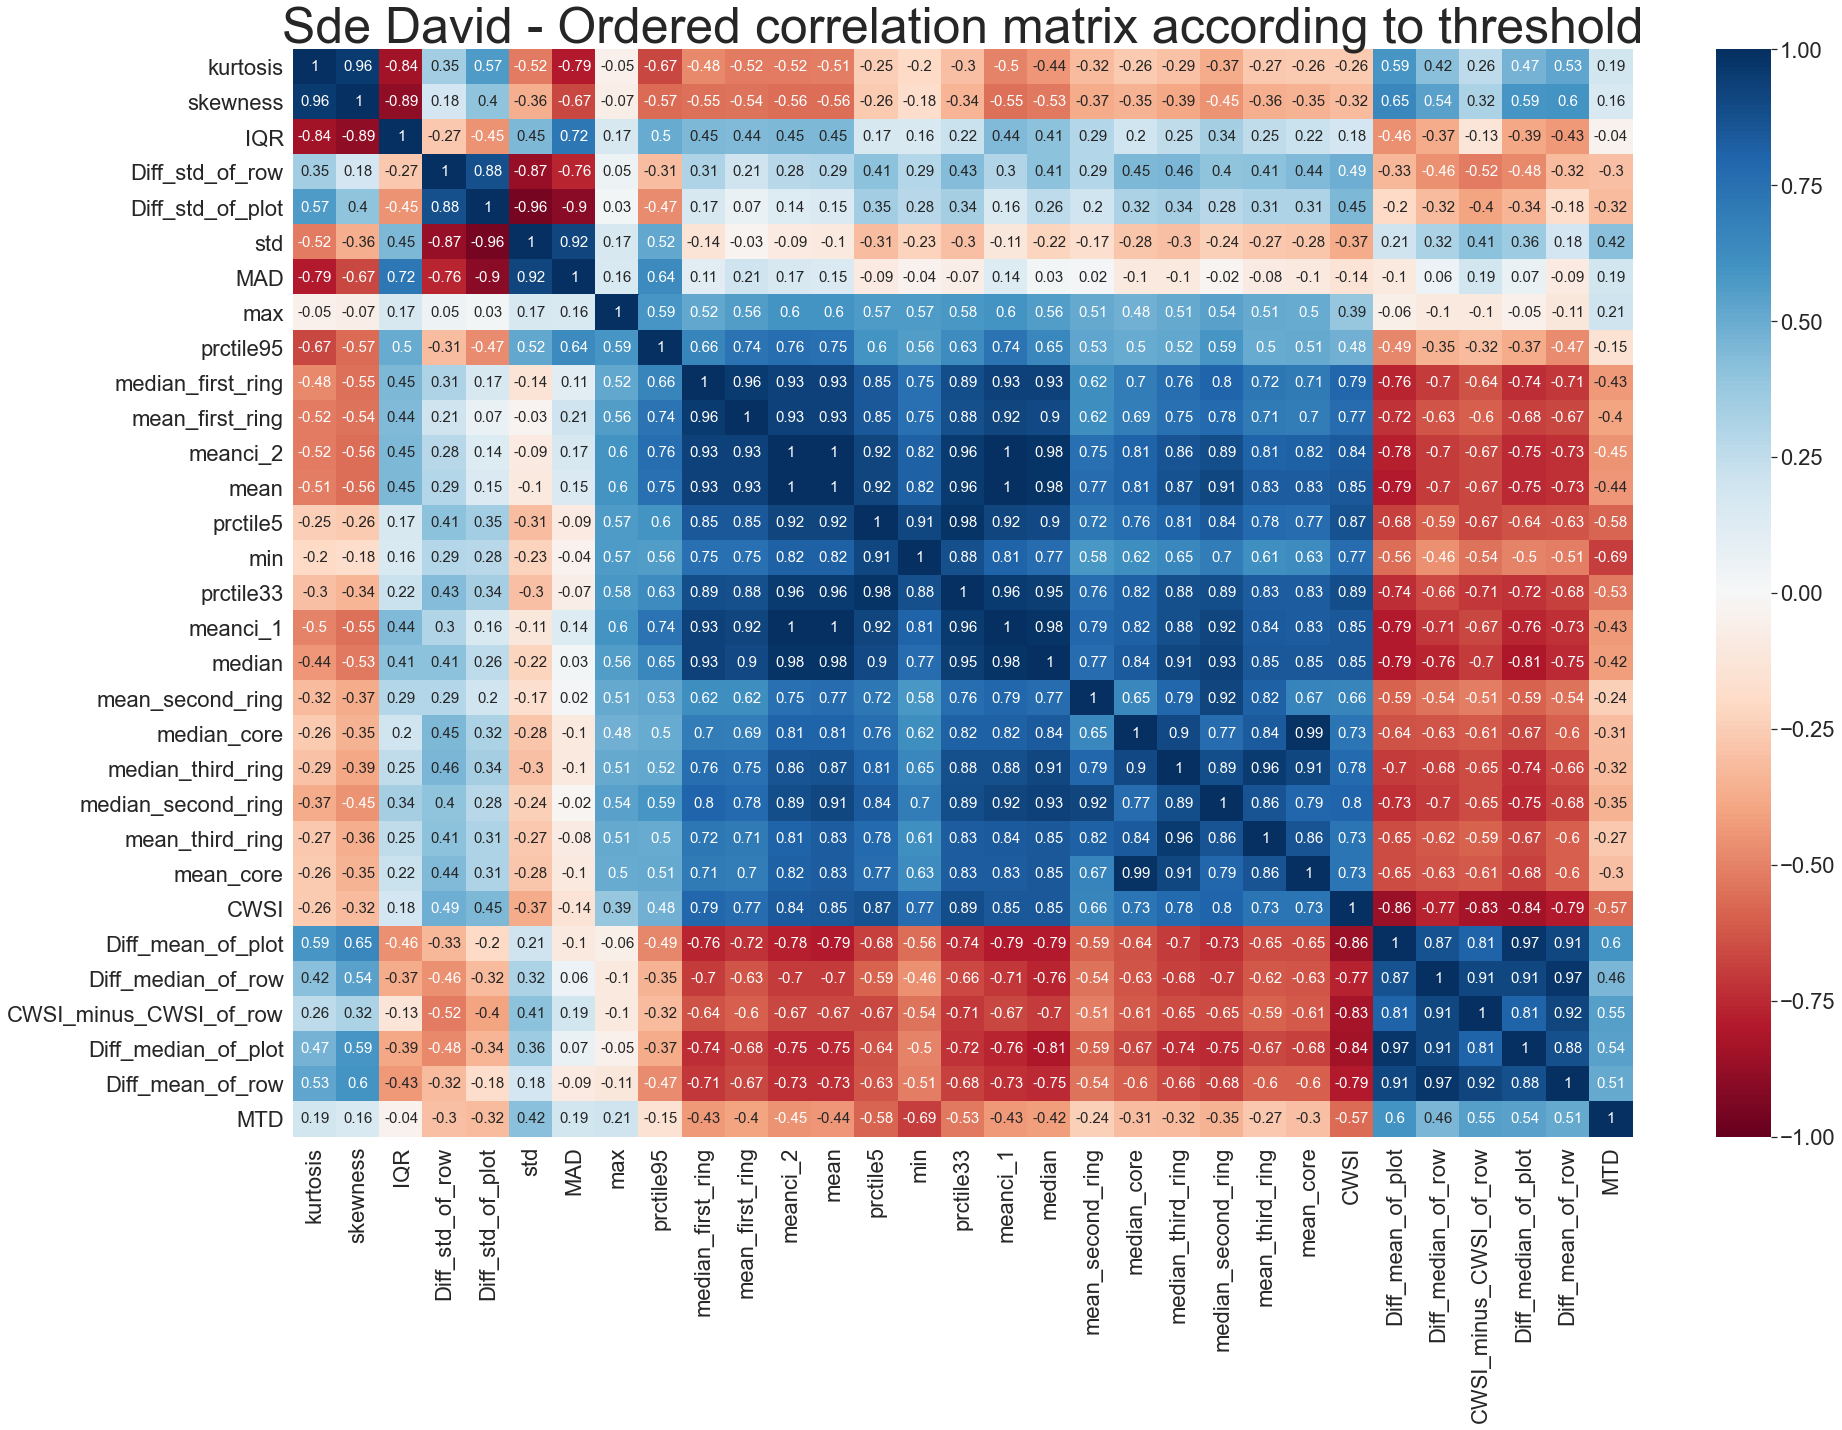

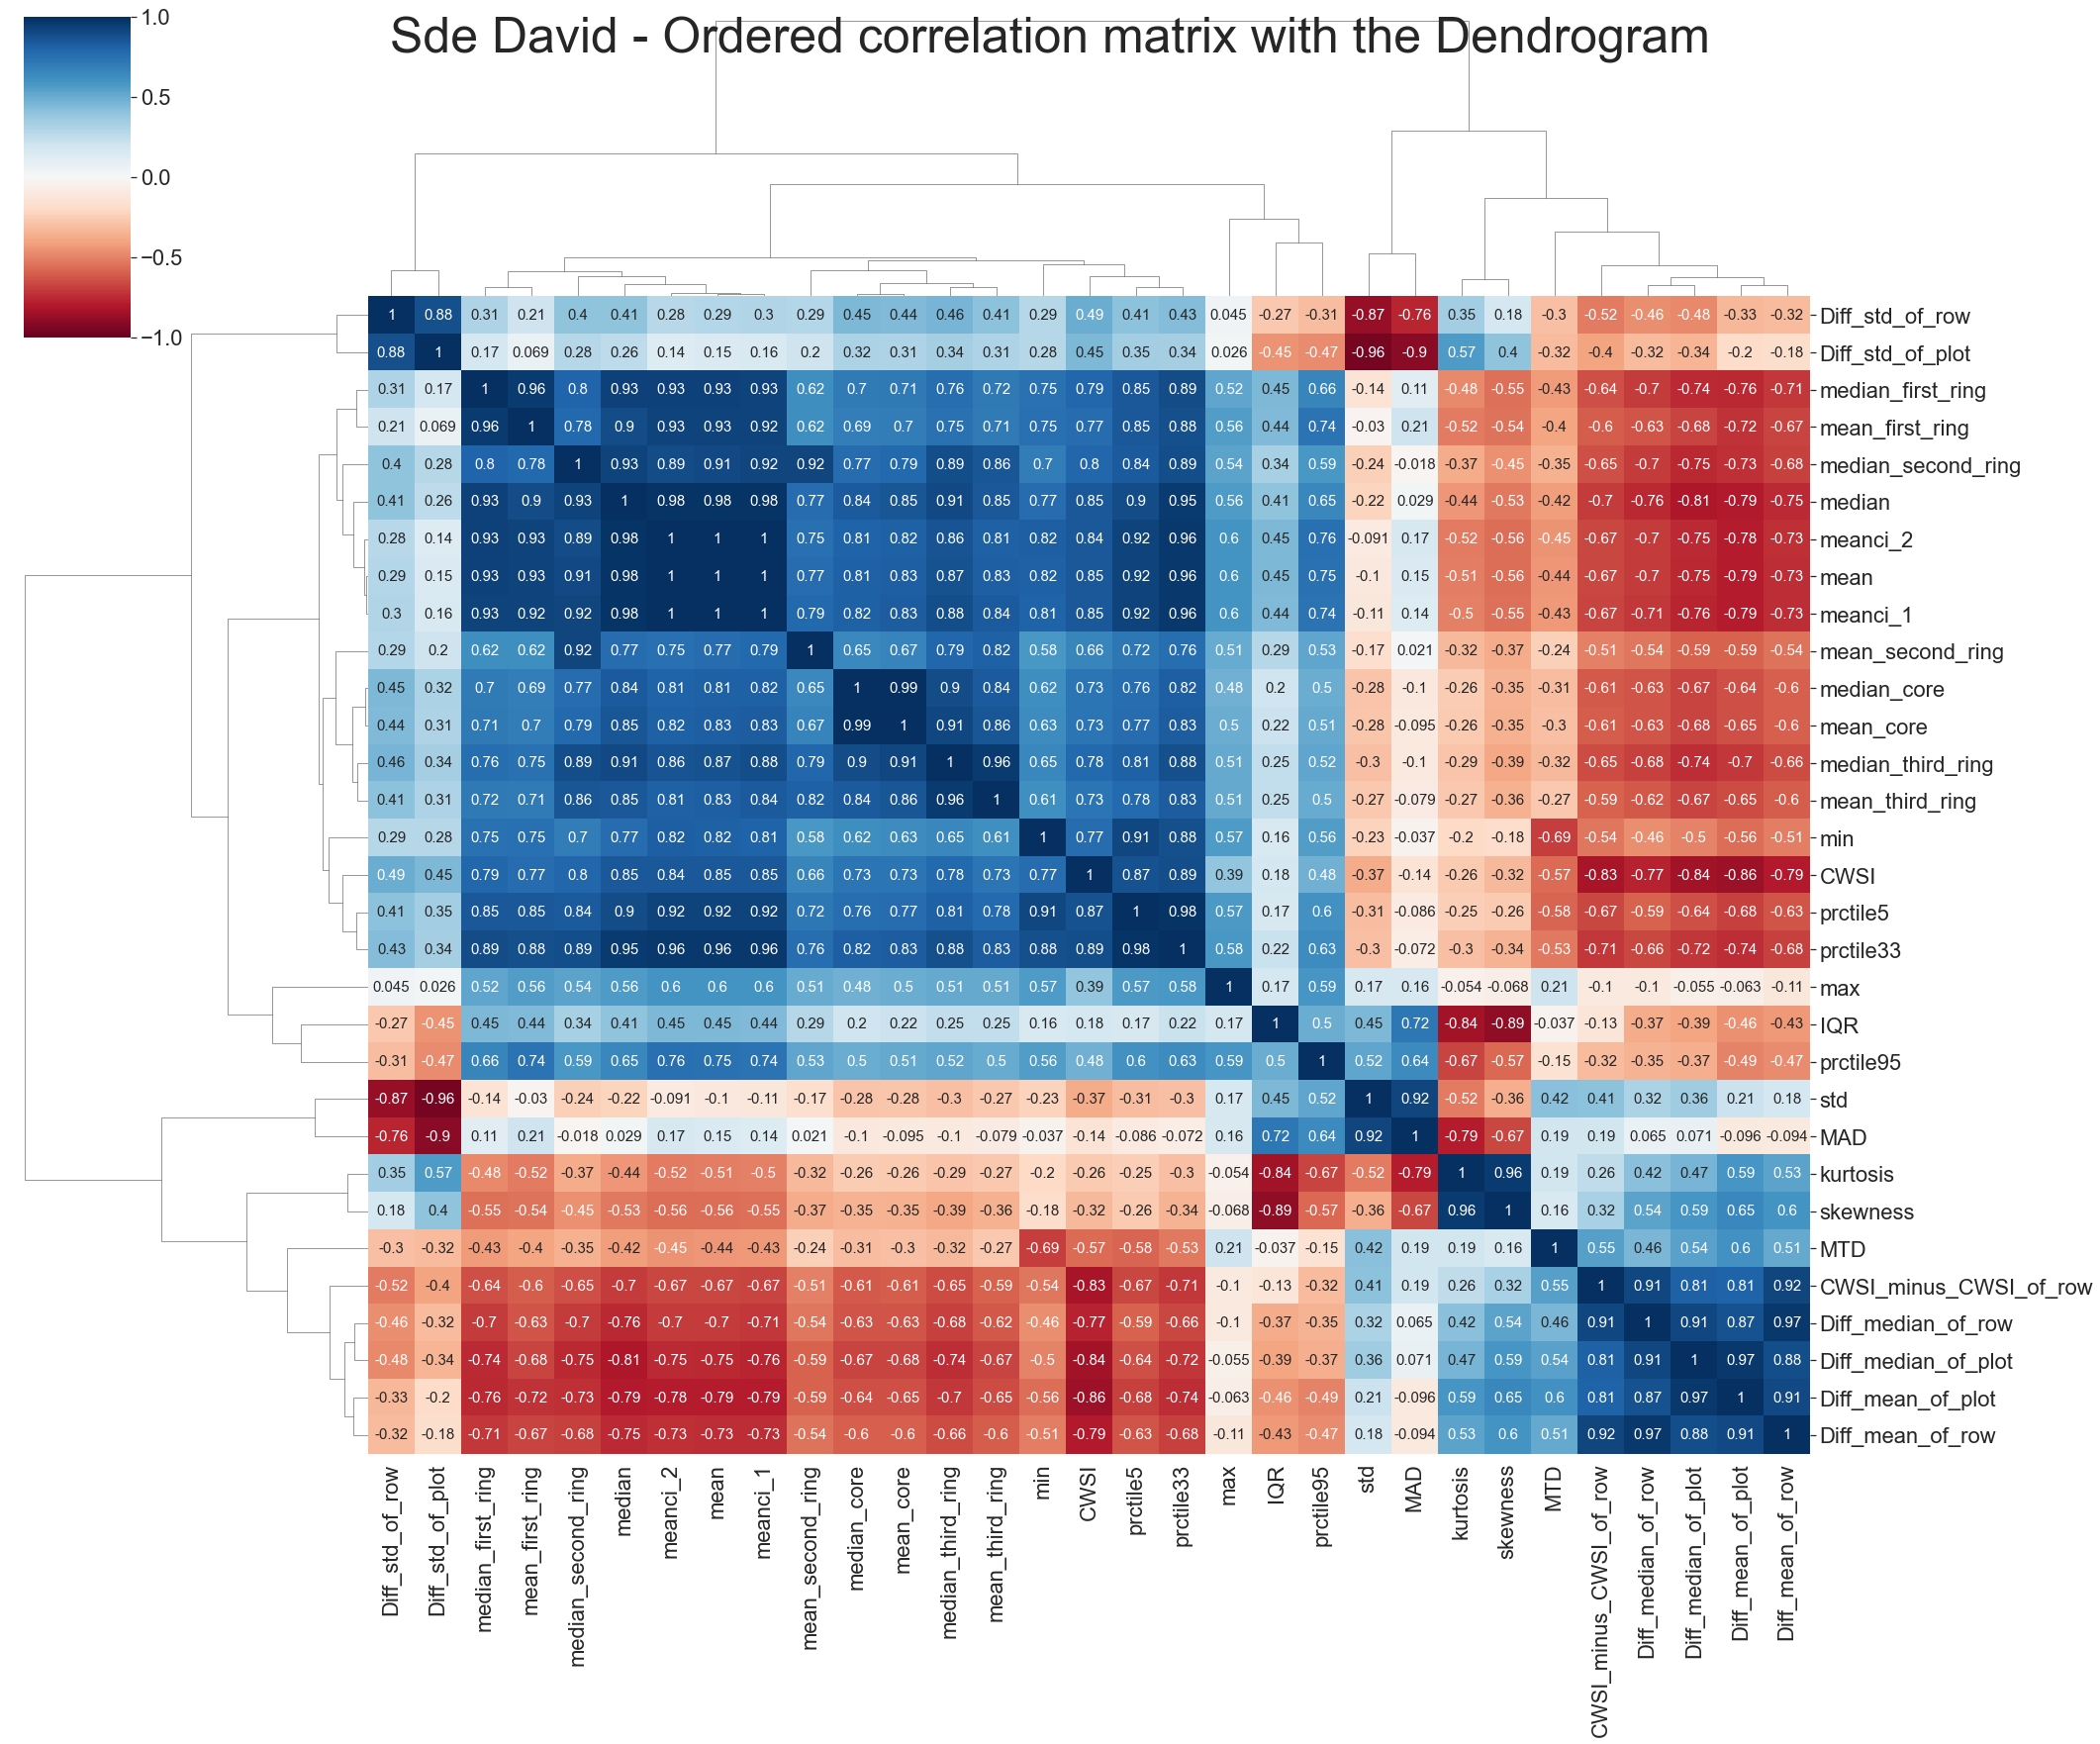

In [4]:
correlations(df_out[predictors],0.4,'Sde David')

# Pearson Partial correlation

In [5]:
def partial_correlations(data,threshold,dataset_name):
    import pingouin as pg

    sns.set(font_scale=2)
    plt.figure(figsize=(30,20))
    correlations = data.pcorr()
    sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
                annot_kws={"size": 15}, vmin=-1, vmax=1).set_title(dataset_name+' - Unordered partial correlation matrix',fontsize=50)

    from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
    from scipy.spatial.distance import squareform
    sns.set_style("whitegrid")

    # plt.figure(figsize=(12,5))
    dissimilarity = 1 - abs(correlations)
    Z = linkage(squareform(dissimilarity,checks=False), 'complete')
    f, ax =plt.subplots(1, 1,figsize=(15,6))
    ax.title.set_text(dataset_name+' - Dendrogram of the Hierarchical Clustering')
    dendrogram(Z, labels=data.columns,ax=ax, orientation='top',
               leaf_rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    # Clusterize the data
    labels = fcluster(Z, threshold, criterion='distance')

    # Show the cluster
    import numpy as np

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(data[i])
        else:
            df_to_append = pd.DataFrame(data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
    plt.figure(figsize=(30,20))
    correlations = clustered.pcorr()
    sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
                annot_kws={"size": 15}, vmin=-1, vmax=1).set_title(dataset_name+' - Ordered partial correlation matrix according to threshold',fontsize=50)
    sns.set(font_scale=2)
    g = sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
                   annot_kws={"size": 15}, vmin=-1, vmax=1, figsize=(30,25)).fig.suptitle(dataset_name+' - Ordered partial correlation matrix with the Dendrogram',fontsize=50)
    return correlations


C:\Users\Stav\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Stav\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


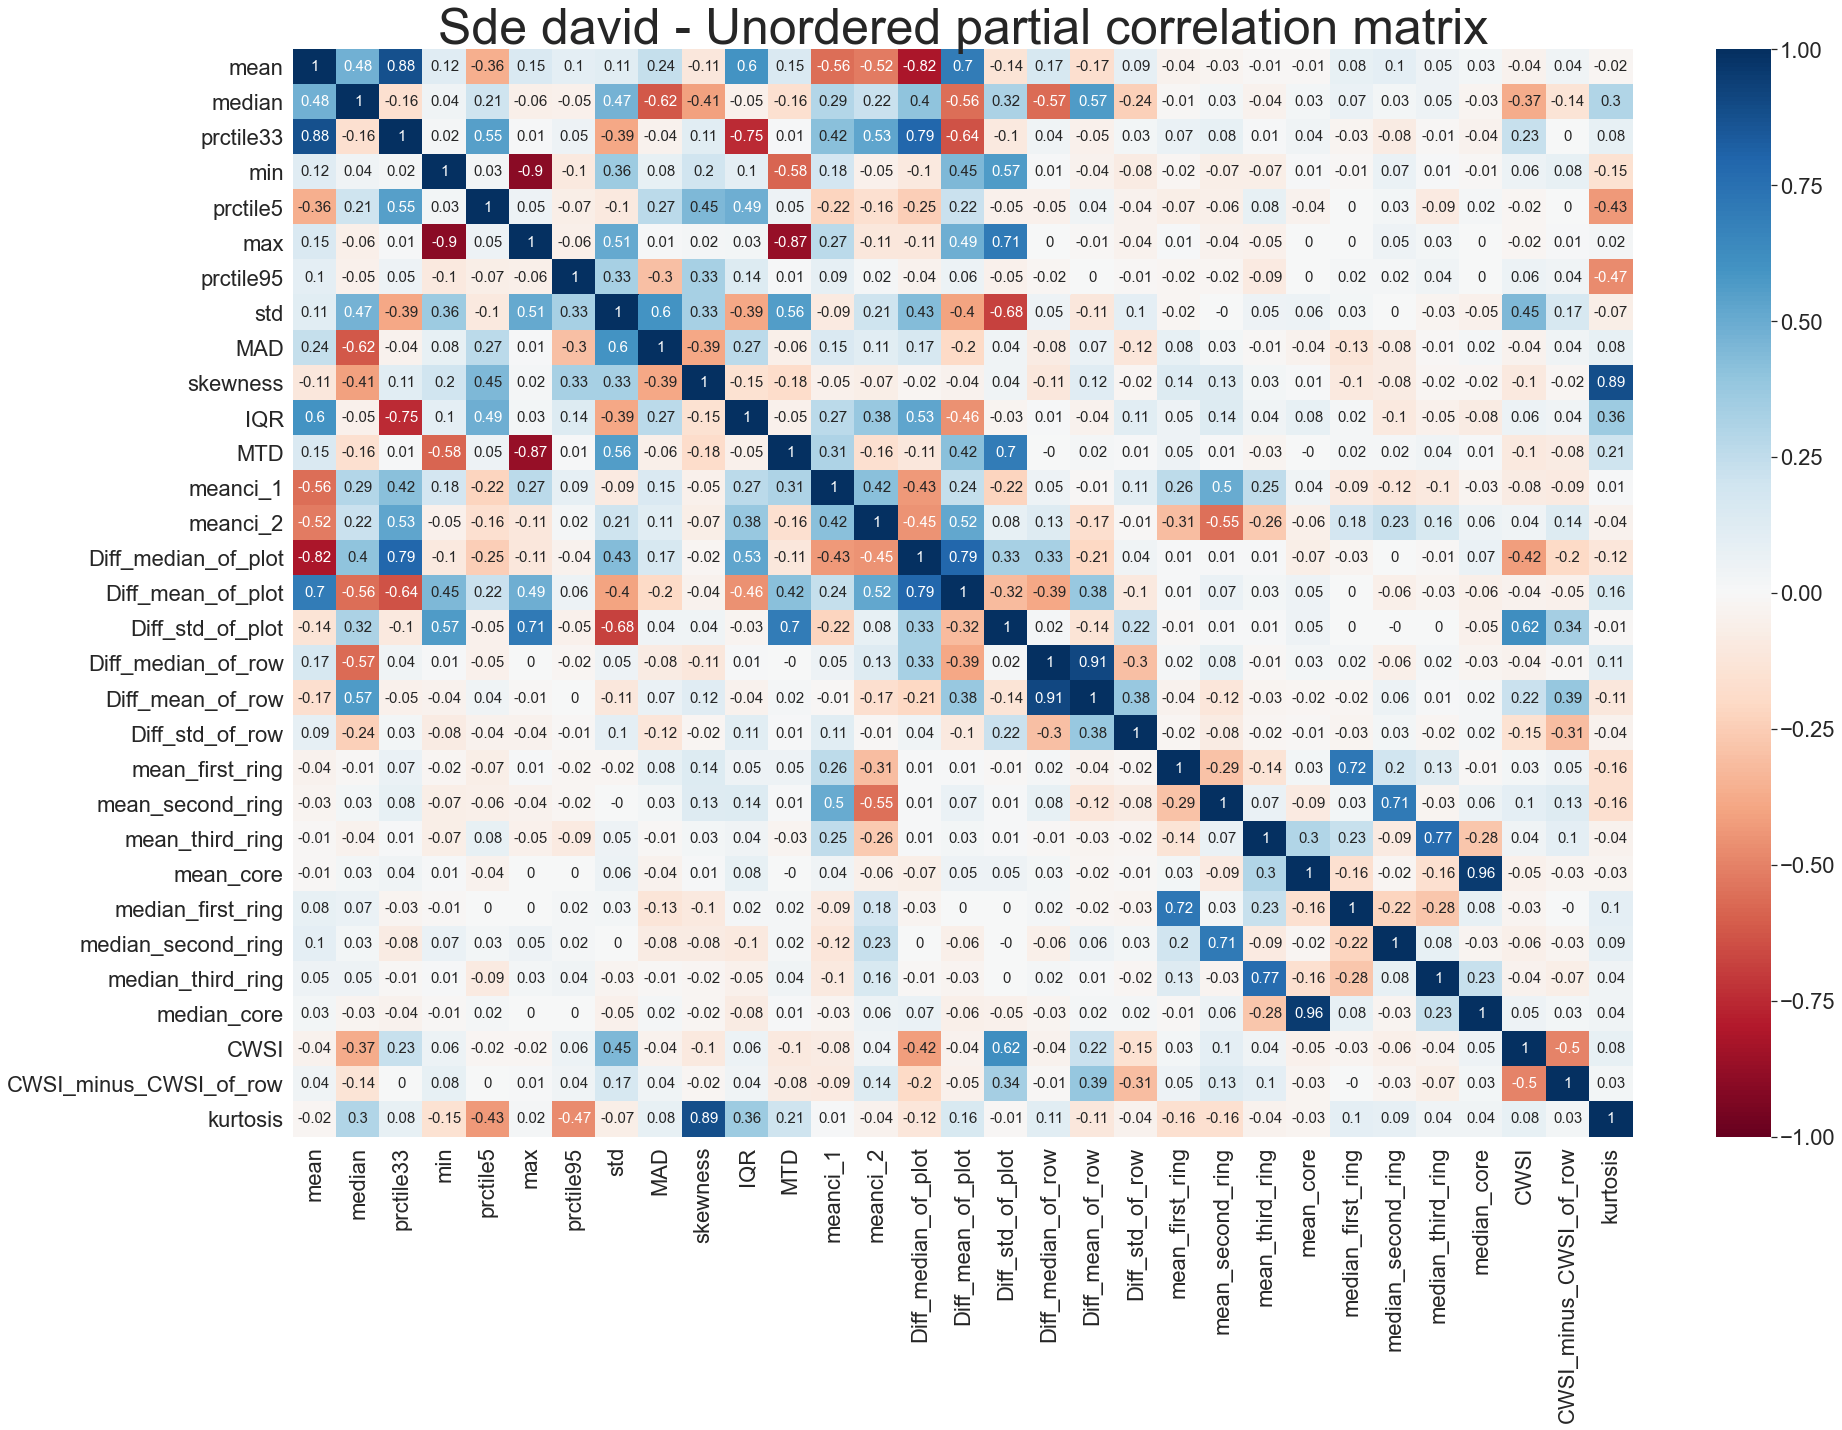

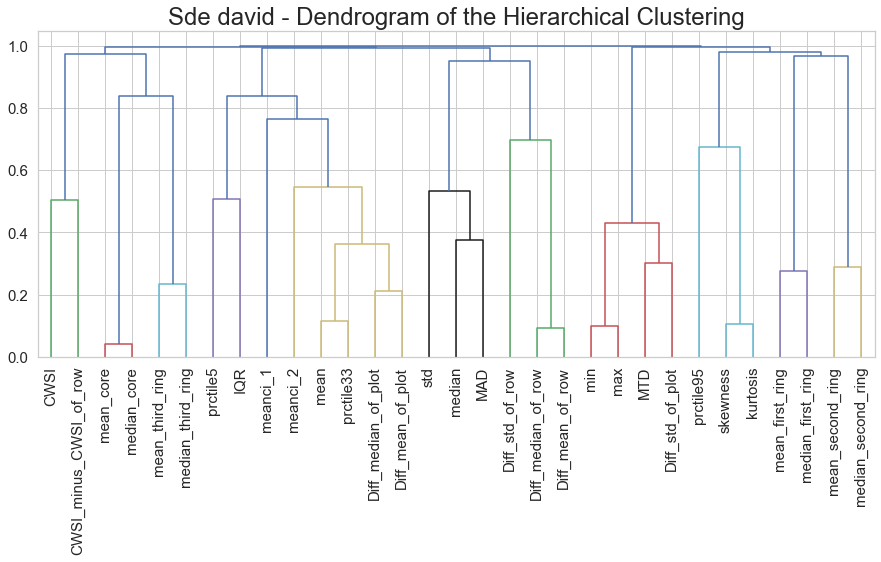

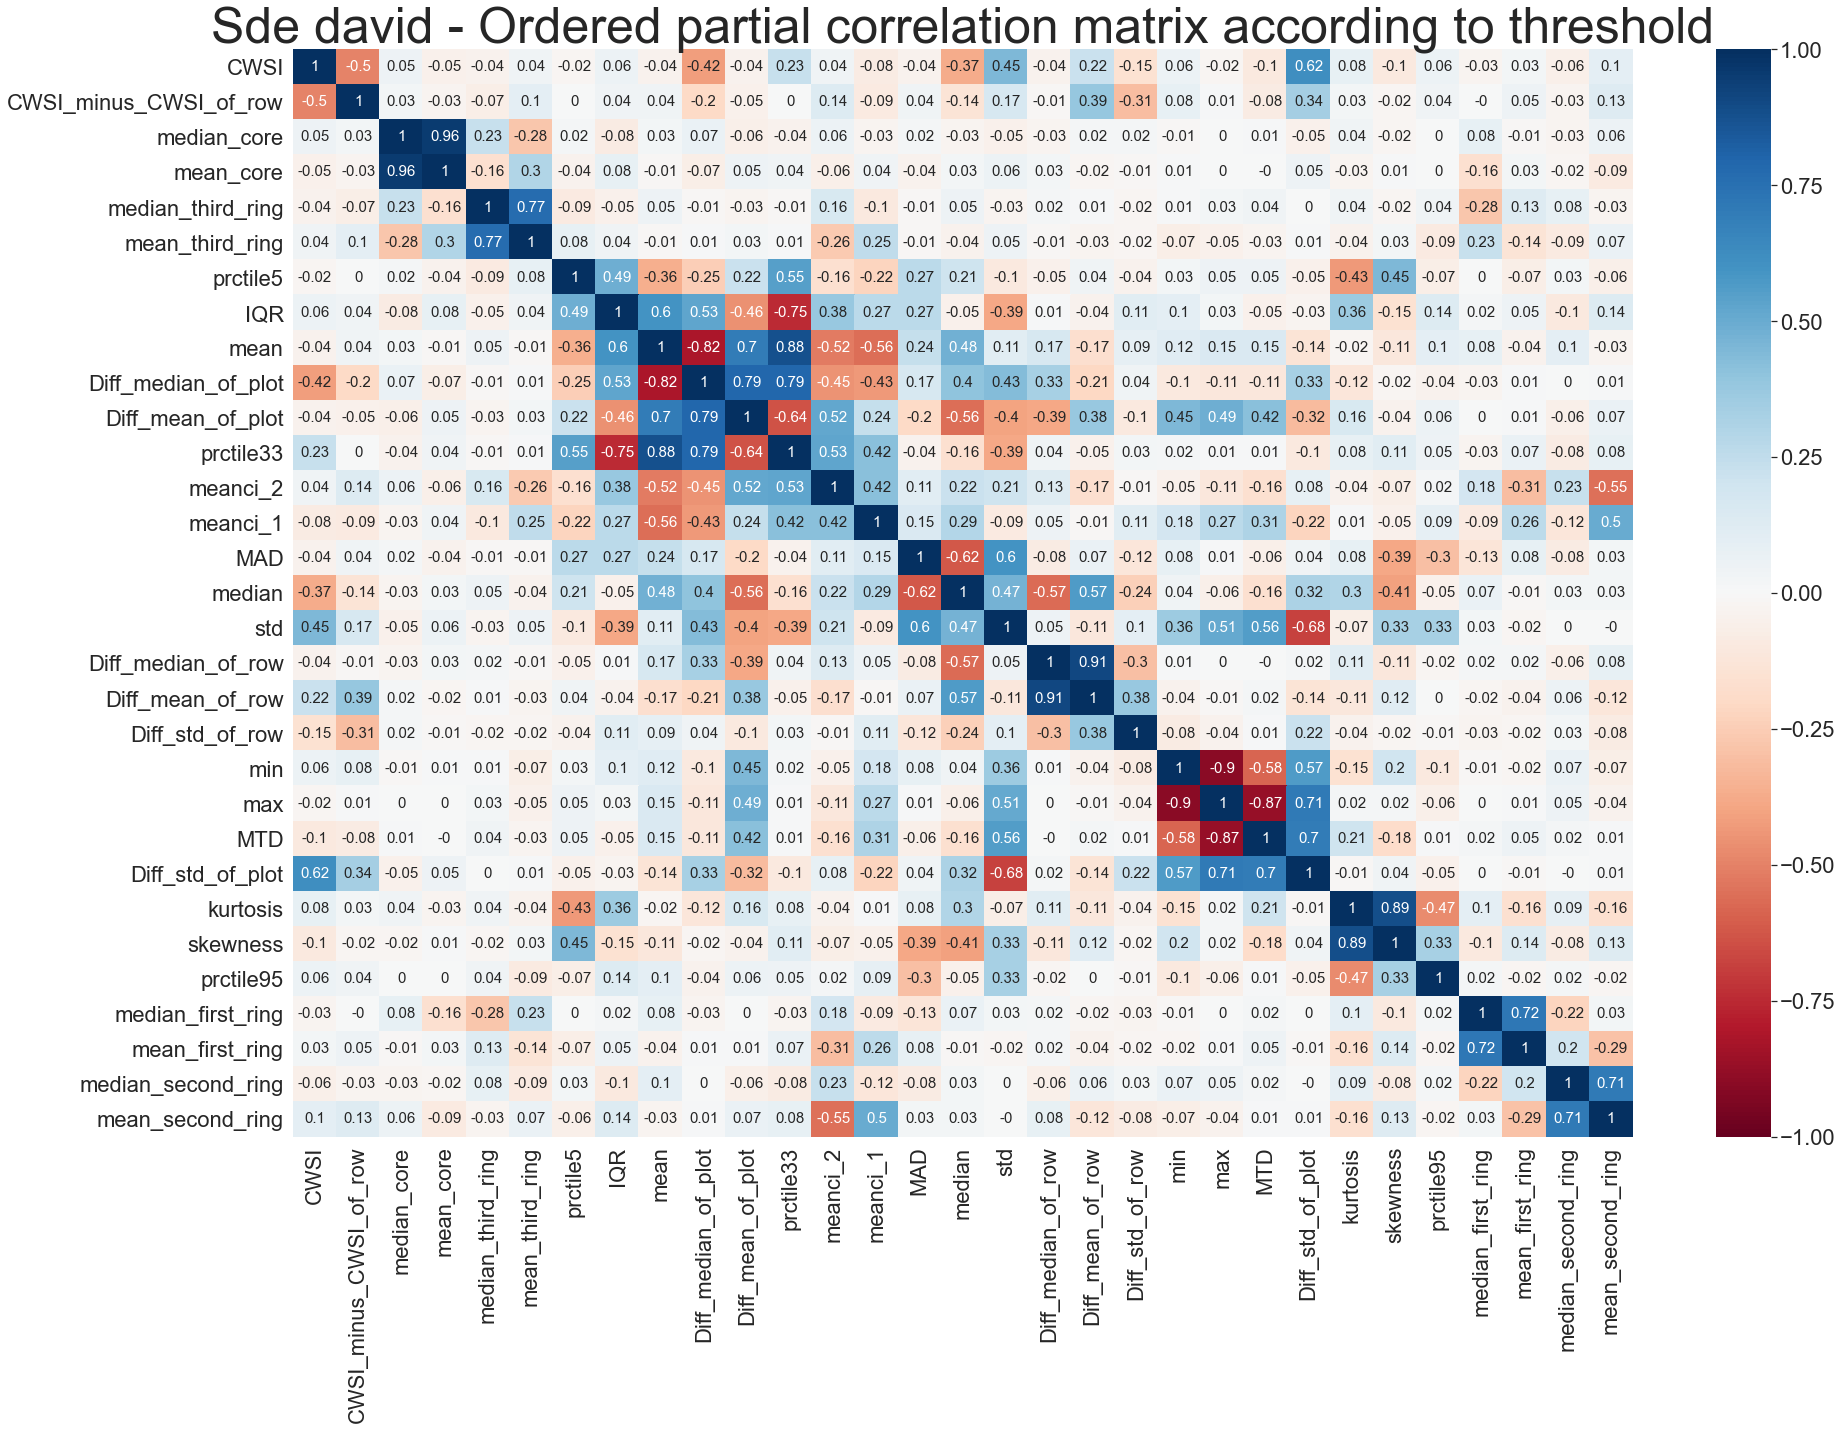

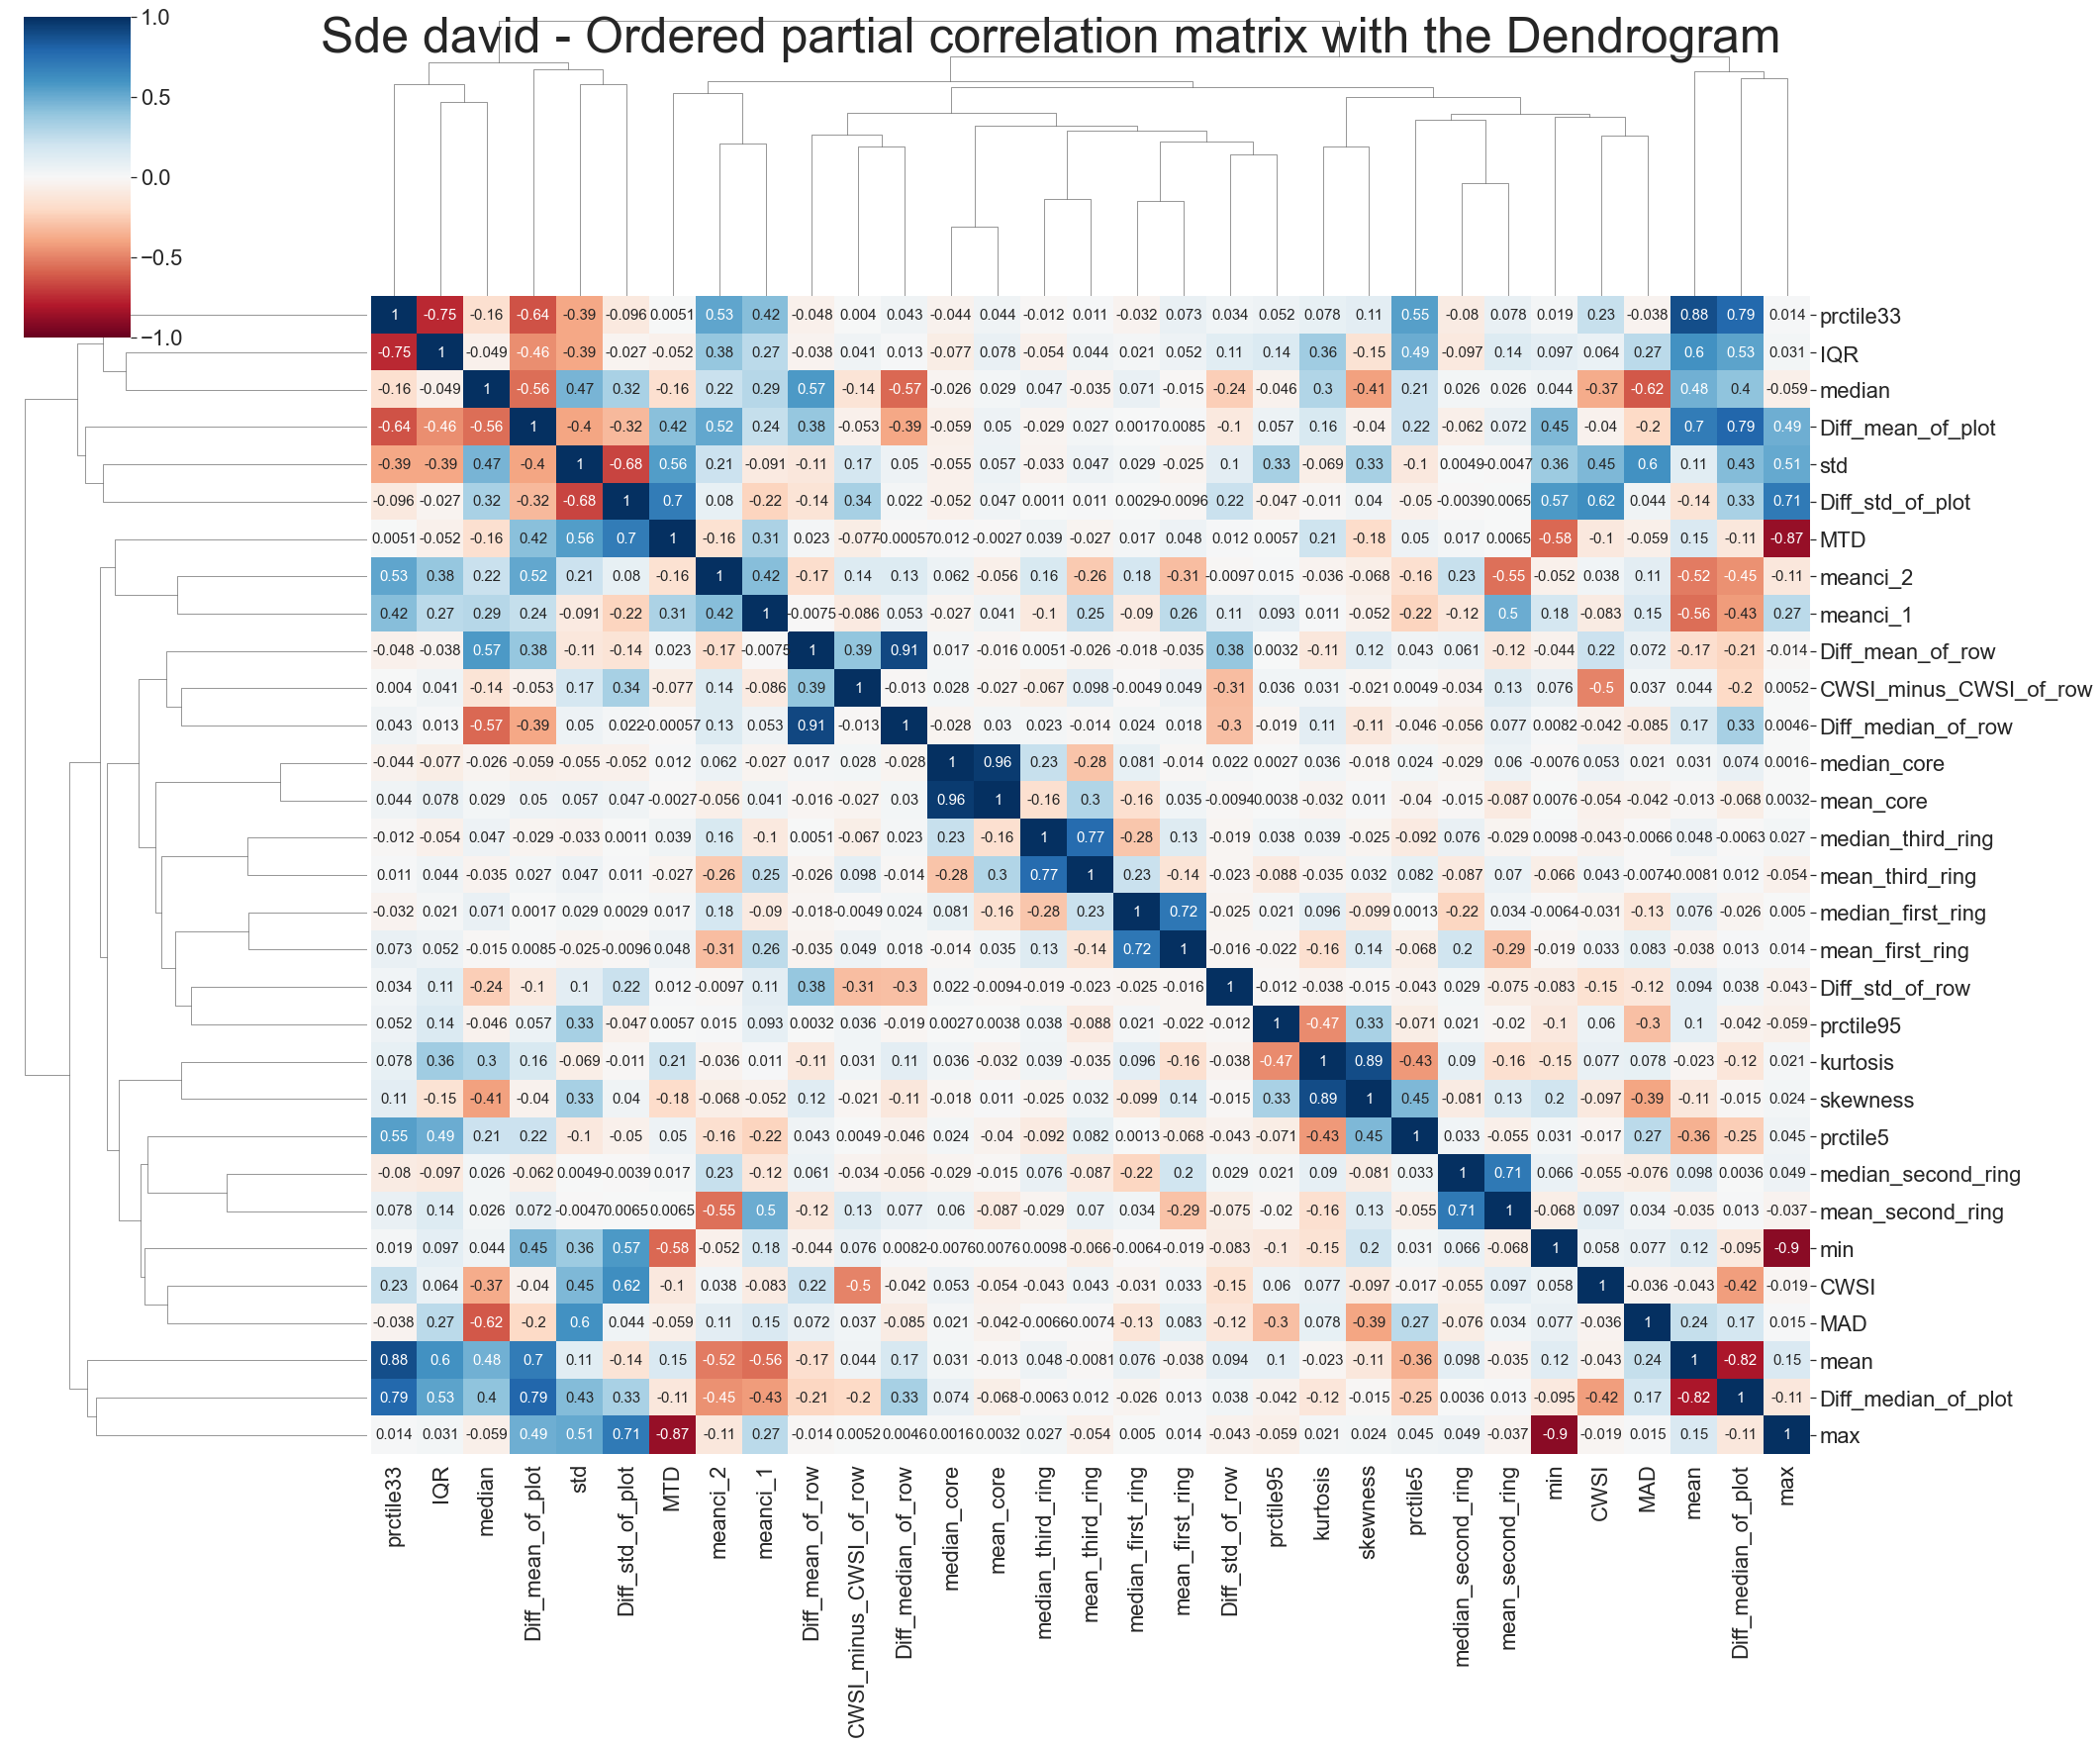

In [6]:
pcor_K_L = partial_correlations(df_out[predictors],0.4,'Sde david')

In [23]:

pcorr = pcor_K_L[predictors]
pcorr_triu = pcorr.stack()
filterd = abs(pcorr_triu[0.7<abs(pcorr_triu)])

print(len(filterd[filterd<1])/2)
Correlated = pd.DataFrame(filterd[filterd<1],columns = ['Sde_David']).reset_index()
Correlated = Correlated[~Correlated[['level_0', 'level_1']].apply(frozenset, axis=1).duplicated()].set_index(['level_0', 'level_1'])
print(Correlated)

14.0
                                         Sde_David
level_0             level_1                       
median_core         mean_core             0.959784
median_third_ring   mean_third_ring       0.766144
IQR                 prctile33             0.753266
mean                prctile33             0.883649
                    Diff_median_of_plot   0.818820
Diff_median_of_plot prctile33             0.788222
                    Diff_mean_of_plot     0.789739
Diff_median_of_row  Diff_mean_of_row      0.908693
min                 max                   0.902824
max                 MTD                   0.871240
                    Diff_std_of_plot      0.709220
kurtosis            skewness              0.893980
median_first_ring   mean_first_ring       0.723347
median_second_ring  mean_second_ring      0.711293


                                         Sde_David
level_0             level_1                       
median_core         mean_core             0.959784
Diff_median_of_row  Diff_mean_of_row      0.908693
min                 max                   0.902824
kurtosis            skewness              0.893980
mean                prctile33             0.883649
max                 MTD                   0.871240
mean                Diff_median_of_plot   0.818820
Diff_median_of_plot Diff_mean_of_plot     0.789739
                    prctile33             0.788222
median_third_ring   mean_third_ring       0.766144
IQR                 prctile33             0.753266
median_first_ring   mean_first_ring       0.723347
median_second_ring  mean_second_ring      0.711293
max                 Diff_std_of_plot      0.709220
                               r
var                             
mean                    0.103445
median                  0.095455
prctile33               0.090503
min                

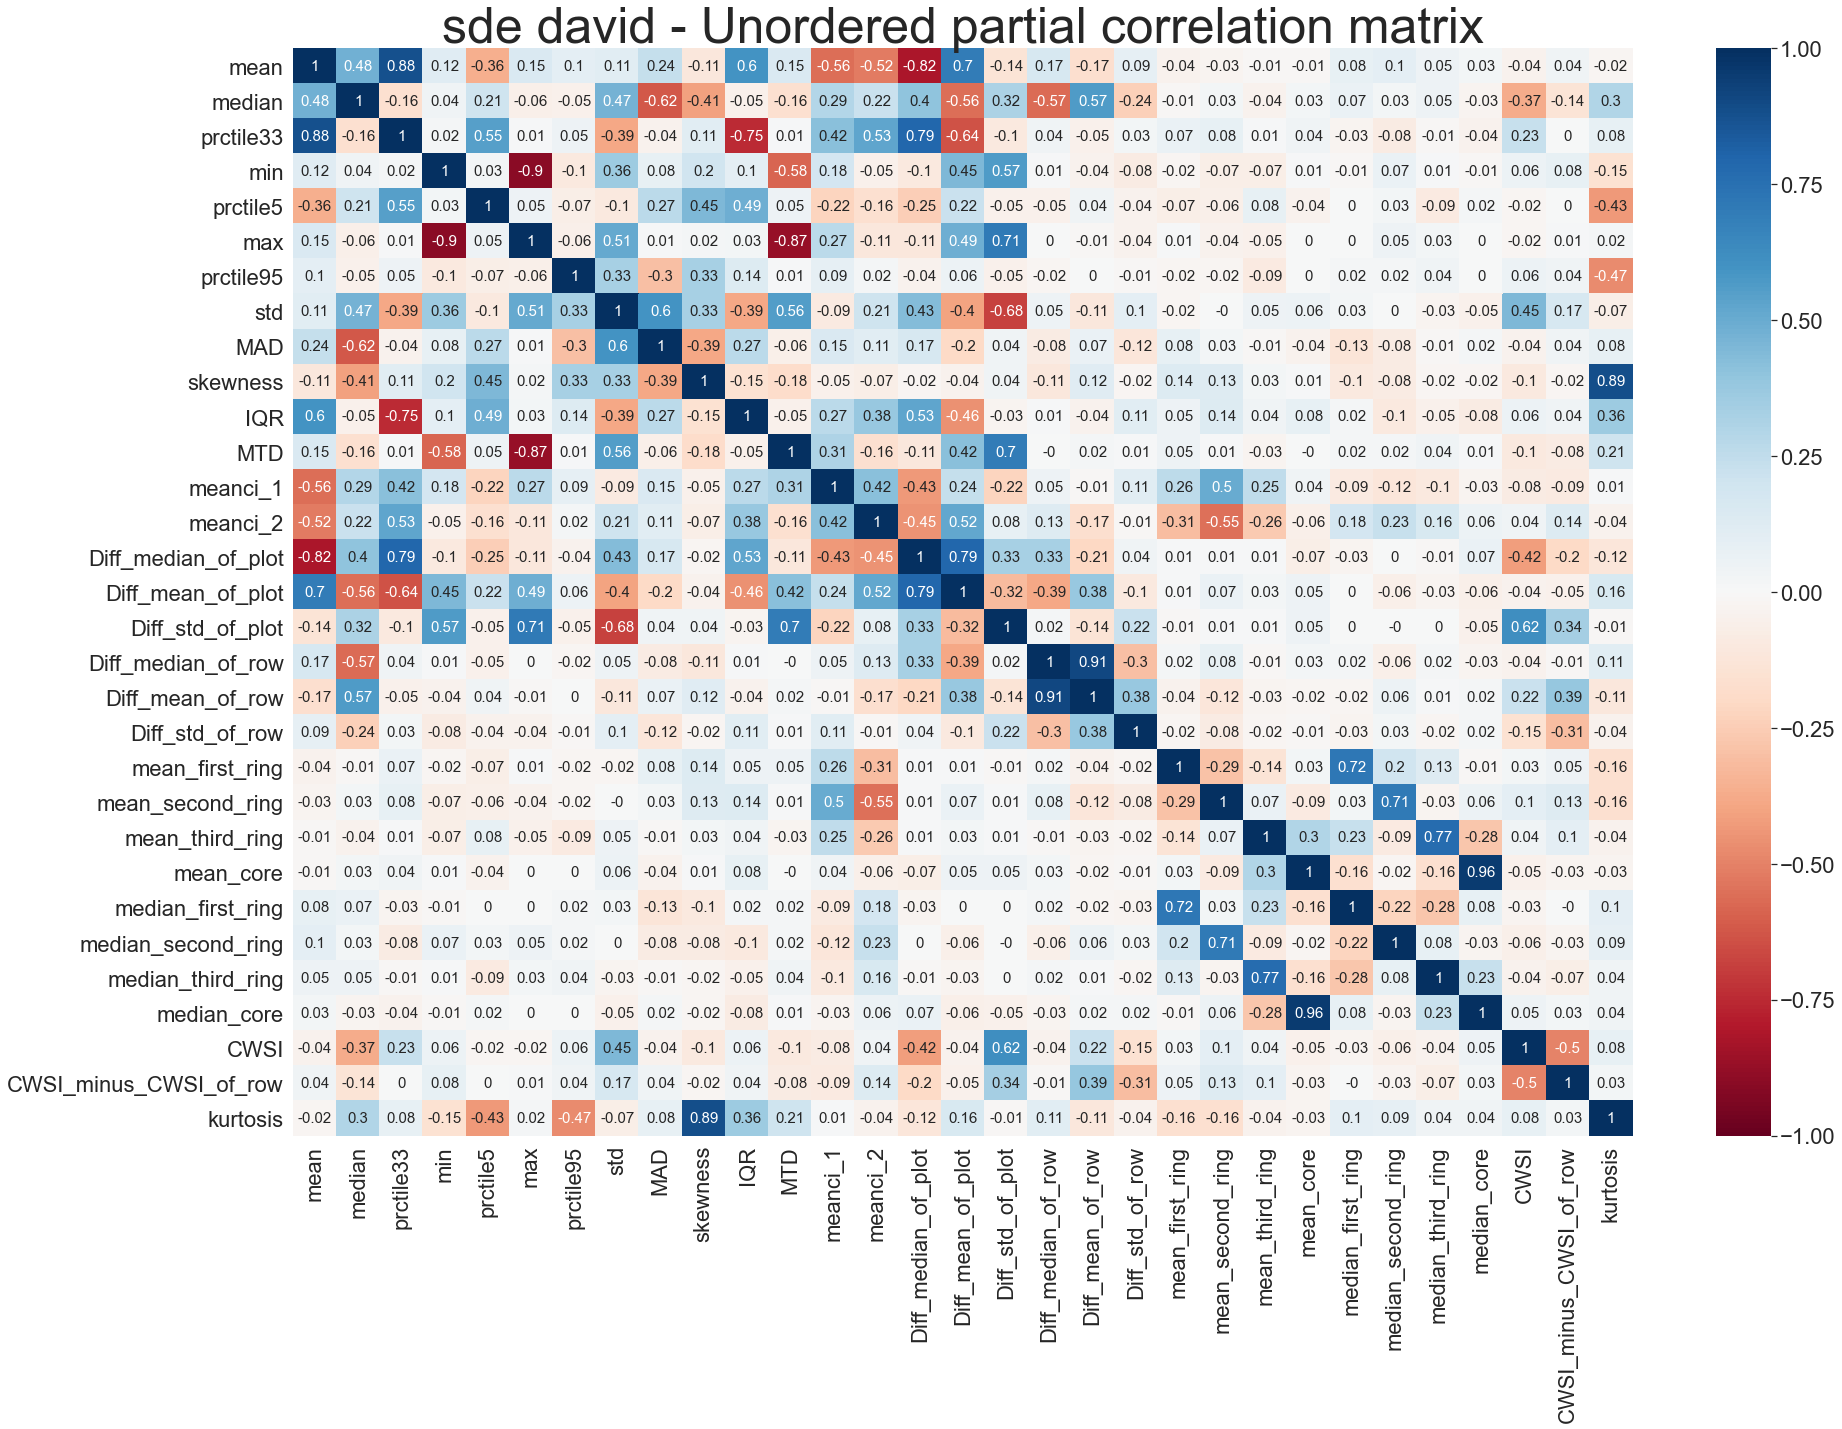

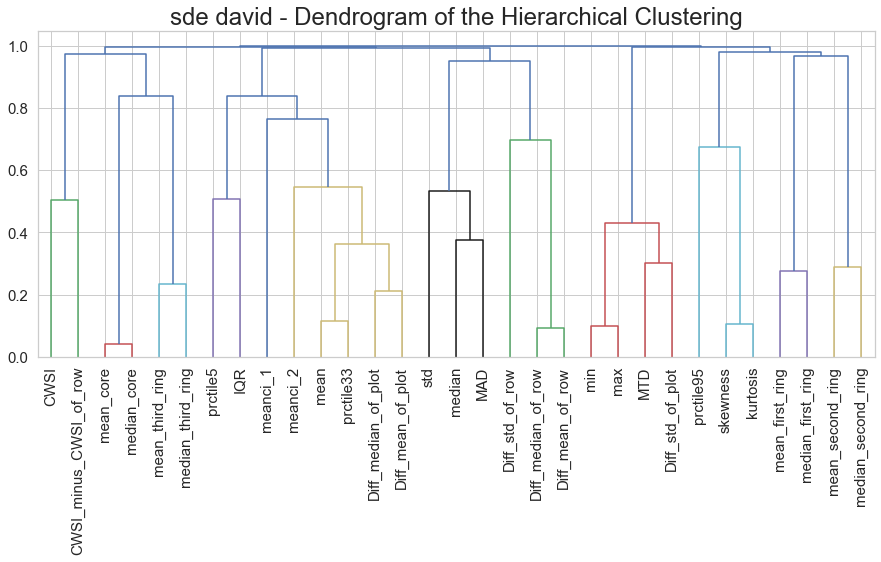

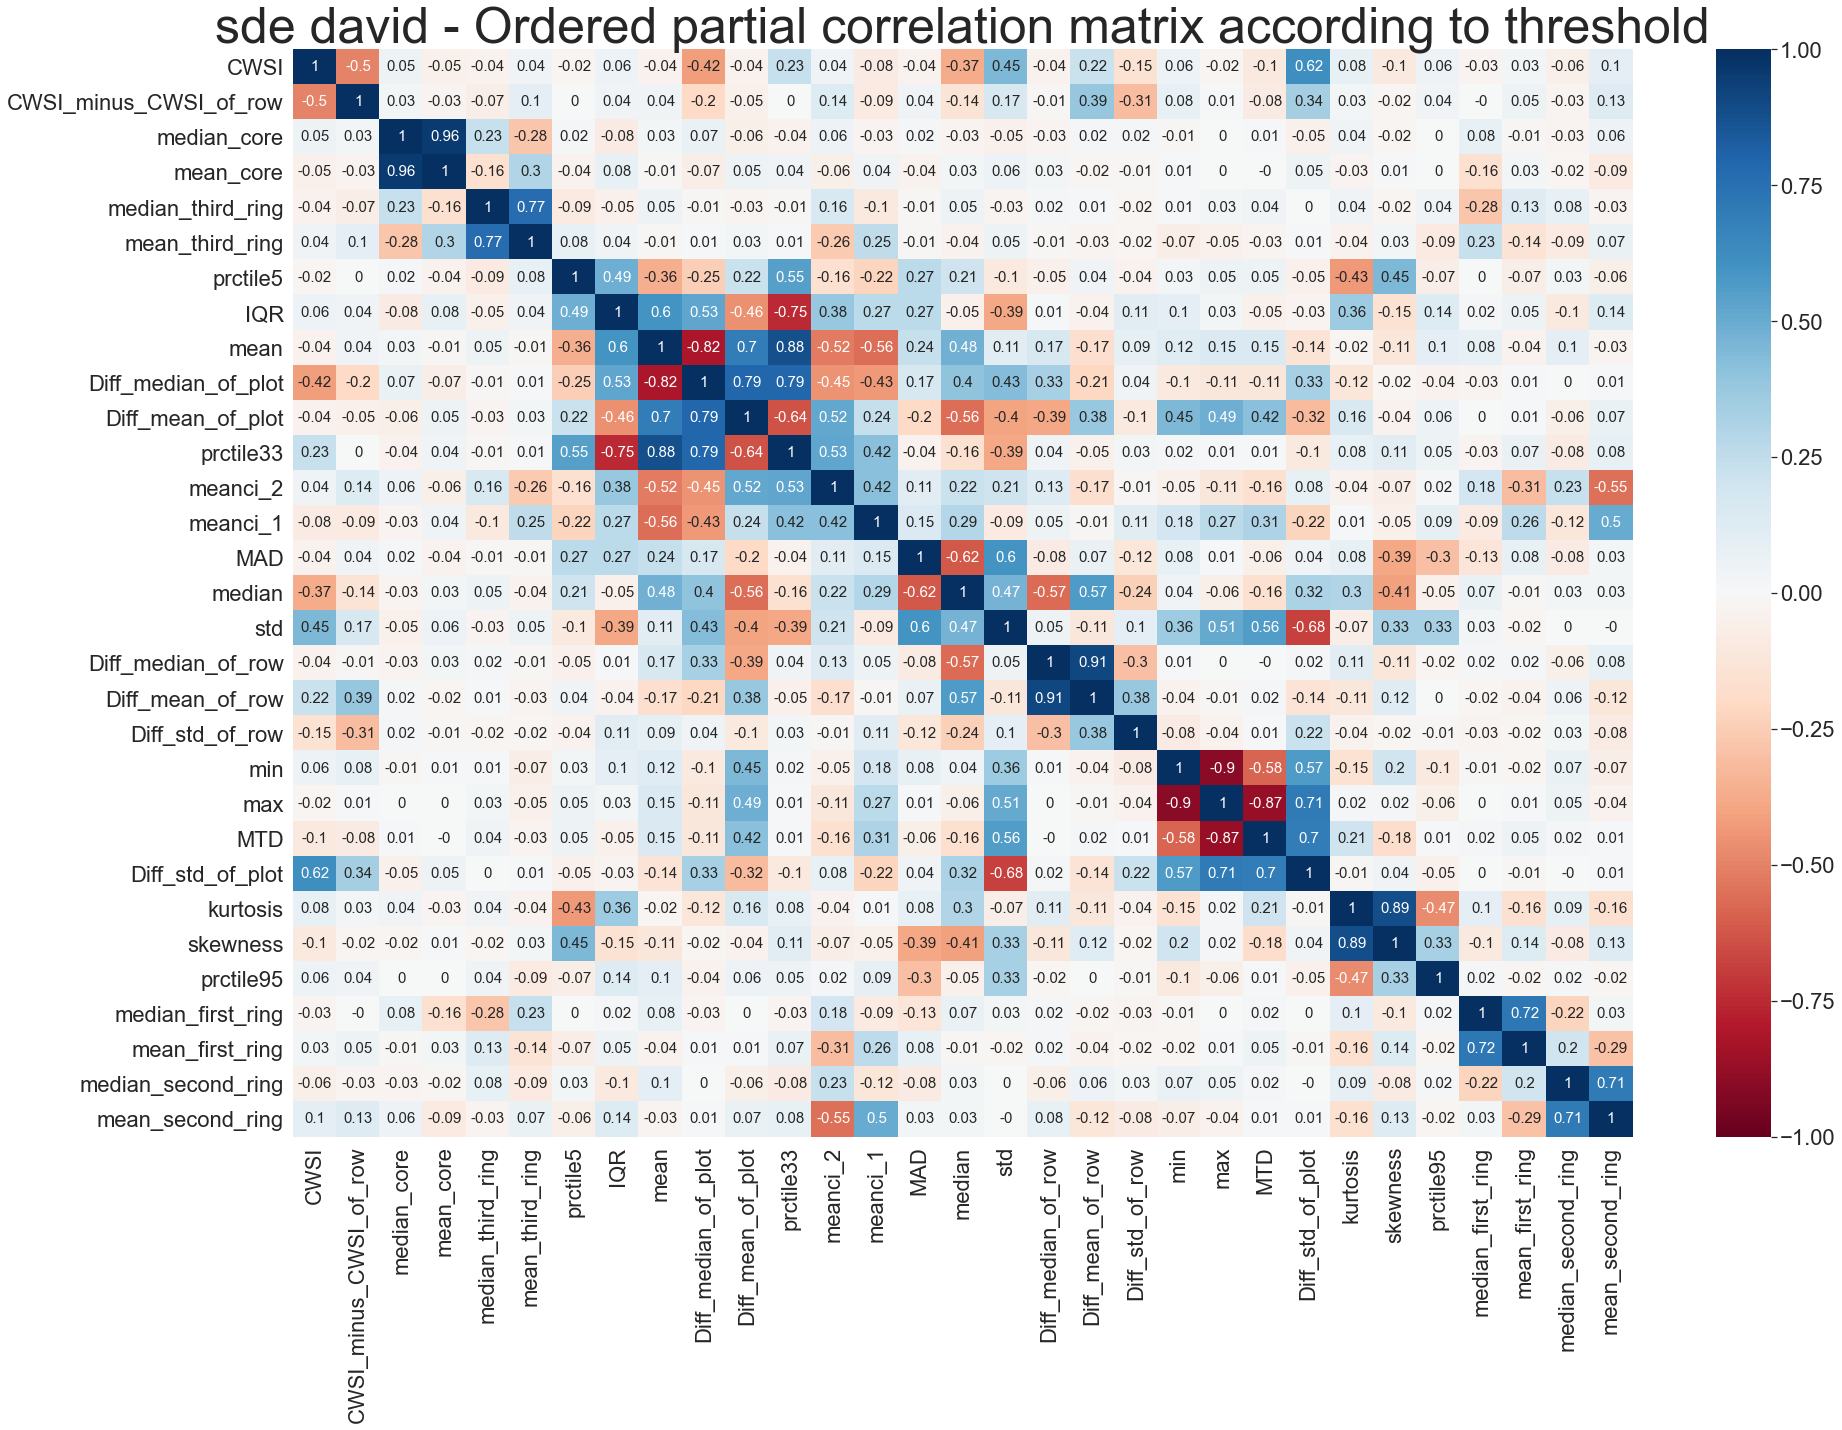

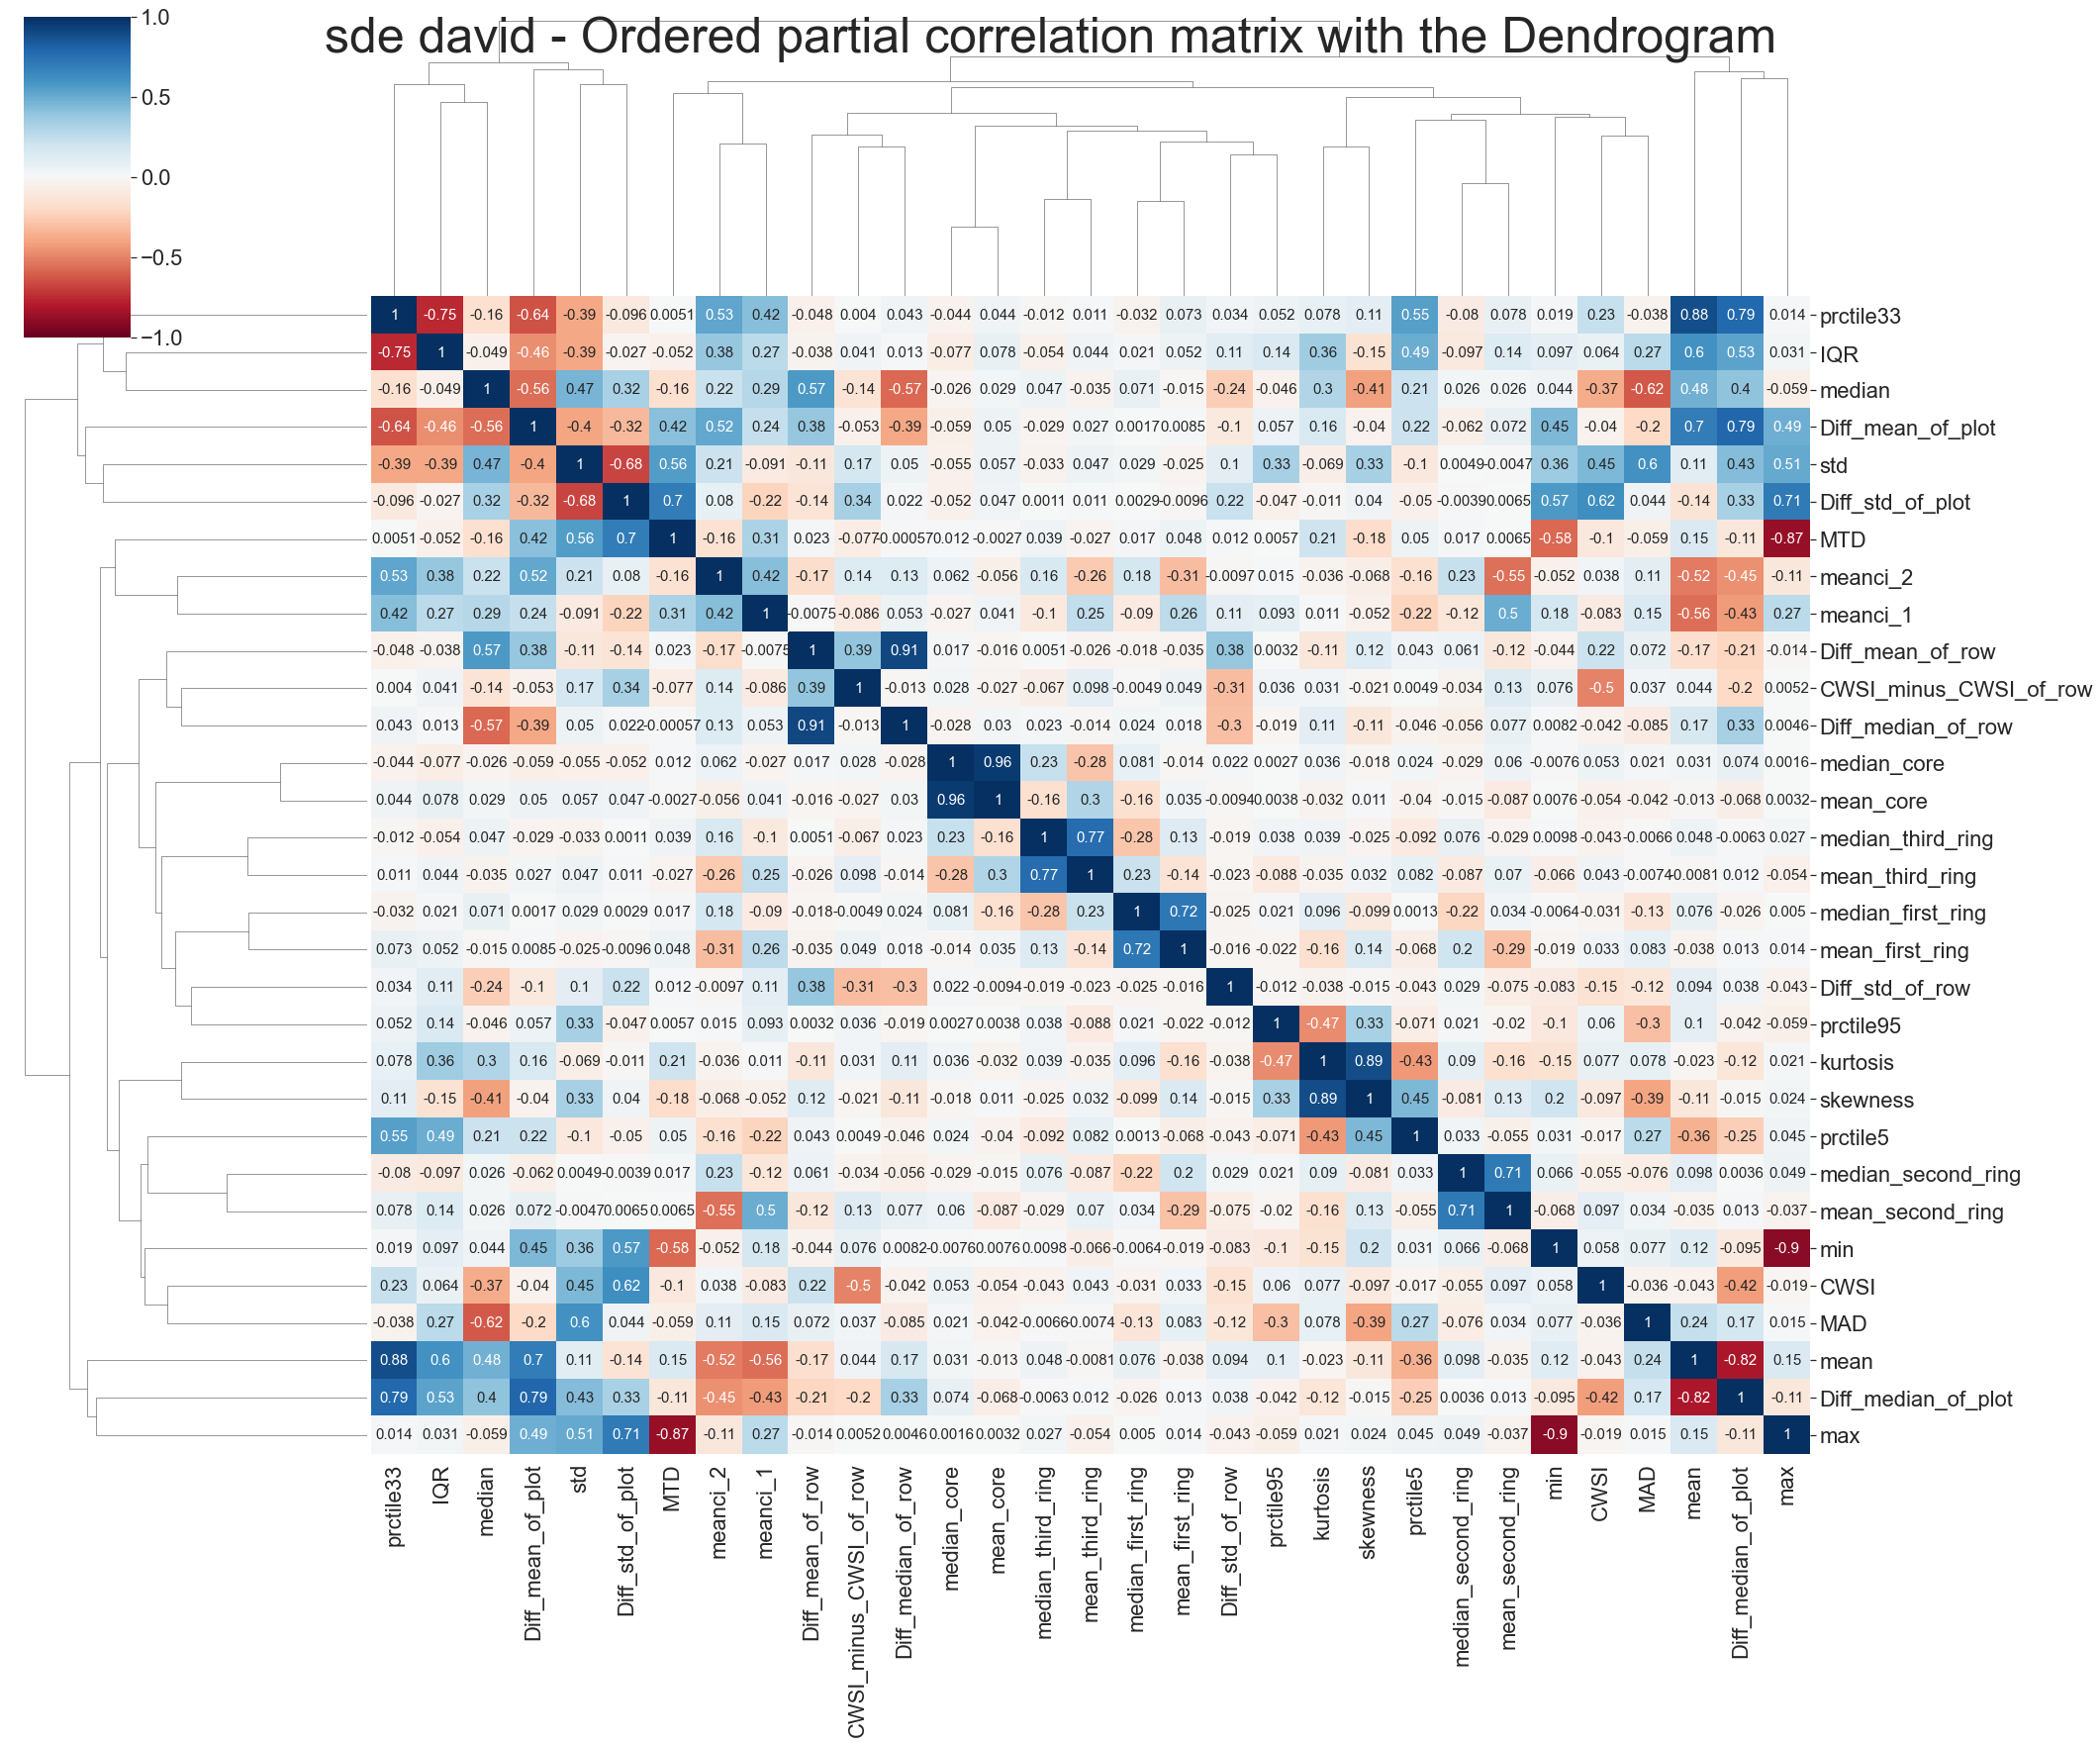

In [24]:
## for myself!
from scipy import stats

predictors = ['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row','kurtosis']
df_out = pd.read_excel(os.path.join('C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_sdeDavid_without_outlires.xlsx')).iloc[: , 1:]
#df_out = pd.read_excel(os.path.join('C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_without_outlires.xlsx')).iloc[: , 1:]
df_out.loc[df_out.Type == 'Clog', 'Y'] = 0
df_out.loc[df_out.Type == 'Control', 'Y'] = 1
df_out.loc[df_out.Type == 'Leak', 'Y'] = 2
pcor_s = partial_correlations(df_out[predictors],0.4,'sde david')
pcorr = pcor_s[predictors]
pcorr_triu = pcorr.stack()
filterd = abs(pcorr_triu[0.7<abs(pcorr_triu)])
Correlated = pd.DataFrame(filterd[filterd<1],columns = ['Sde_David']).reset_index()
Correlated = Correlated[~Correlated[['level_0', 'level_1']].apply(frozenset, axis=1).duplicated()].set_index(['level_0', 'level_1'])
#Correlated = Correlated.sort_values(by = 'Sde_David',ascending=False)
print(Correlated.sort_values(by = 'Sde_David',ascending=False))

cor, pvalue = stats.spearmanr(df_out[predictors],df_out['Y'])
spearmanr = pd.DataFrame(abs(cor))[[31]].drop(31).rename(columns={31: "r"}).sort_values(by=['r'],ascending=False)
spearmanr['var']=predictors
spearmanr = spearmanr.set_index('var').sort_values(by = 'r',ascending=False)
print(spearmanr)



In [25]:
import sys
var_to_remove = {}
#print(Correlated)
eliminated_pred = []
for i, row in Correlated.iterrows():

    level_0, level_1 = i[0], i[1]
    if level_0 in var_to_remove: continue
    r_0 = spearmanr.loc[level_0].to_list()
    r_0 = r_0[0] if r_0 else r_0
    r_1 = spearmanr.loc[level_1].to_list()
    r_1 = r_1[0] if r_1 else r_1
    F_remove = level_0 if abs(r_0) < abs(r_1) else level_1
    r_remove = abs(r_0)if abs(r_0) < abs(r_1) else abs(r_1)
    F_exclude = level_1 if abs(r_0) < abs(r_1) else level_0
    r_exclude =  abs(r_1)if abs(r_0) < abs(r_1) else abs(r_0)
    #var_to_remove.append(level_0 if r_0 < r_1 else level_1)
    var_to_remove[F_remove] = [F_remove, F_exclude,r_remove, r_exclude]
    eliminated_pred.append(F_exclude)
print(len(var_to_remove.keys()))
table = pd.DataFrame(var_to_remove.values(), columns = ['Included Feature','Excluded Feature','Included Feature','Excluded Feature'])
print(table)
table.to_excel("C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\results\\iter.xlsx")
DataNew = df_out.drop(eliminated_pred, axis=1).copy(True)
DataNew.to_excel("C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\results\\data_SdeDavid_afer_DataPreparation.xlsx") 

10
      Included Feature    Excluded Feature  Included Feature  Excluded Feature
0          median_core           mean_core          0.006548          0.016491
1    median_third_ring     mean_third_ring          0.009336          0.017114
2                  IQR           prctile33          0.047937          0.090503
3            prctile33                mean          0.090503          0.103445
4  Diff_median_of_plot                mean          0.028362          0.103445
5     Diff_mean_of_row  Diff_median_of_row          0.020947          0.023151
6                  max                 min          0.063491          0.081865
7             kurtosis            skewness          0.006055          0.048359
8    median_first_ring     mean_first_ring          0.011868          0.018391
9   median_second_ring    mean_second_ring          0.011008          0.017860


### Pearson Partial correlation

In [7]:
pcorr = df_out[predictors].pcorr()
pcorr_triu = pcorr.stack()
filterd = pcorr_triu[0.7<=pcorr_triu]


#print(len(filterd[filterd<1])/2)

Correlated_combined = pd.DataFrame(filterd[filterd<1],columns = ['sdeDavid']).reset_index()

Correlated_combined_new = Correlated_combined[~Correlated_combined[['level_0', 'level_1']].apply(frozenset, axis=1).duplicated()].set_index(['level_0', 'level_1'])
Correlated_combined_new


sdeDavid
level_0             level_1                      
mean                prctile33            0.883649
prctile33           Diff_median_of_plot  0.788222
max                 Diff_std_of_plot     0.709220
skewness            kurtosis             0.893980
Diff_median_of_plot Diff_mean_of_plot    0.789739
Diff_median_of_row  Diff_mean_of_row     0.908693
mean_first_ring     median_first_ring    0.723347
mean_second_ring    median_second_ring   0.711293
mean_third_ring     median_third_ring    0.766144
mean_core           median_core          0.959784

In [8]:
all_Correlated = pd.concat([Correlated_combined_new],axis=1)
all_Correlated

sdeDavid
level_0             level_1                      
mean                prctile33            0.883649
prctile33           Diff_median_of_plot  0.788222
max                 Diff_std_of_plot     0.709220
skewness            kurtosis             0.893980
Diff_median_of_plot Diff_mean_of_plot    0.789739
Diff_median_of_row  Diff_mean_of_row     0.908693
mean_first_ring     median_first_ring    0.723347
mean_second_ring    median_second_ring   0.711293
mean_third_ring     median_third_ring    0.766144
mean_core           median_core          0.959784

# Spearman Correlation

In [9]:
df_out.loc[df_out.Type == 'Clog', 'Y'] = 0
df_out.loc[df_out.Type == 'Control', 'Y'] = 1
df_out.loc[df_out.Type == 'Leak', 'Y'] = 2
print(df_out)

        Type Plot  Site_Name      mean       min  prctile5        max  \
0       Leak    A  Sde_David  3.304325  0.100279  0.829976  13.179007   
1       Leak    A  Sde_David  3.695116  1.240127  1.660010  13.368806   
2       Leak    A  Sde_David  2.594370  0.130210  0.770016  13.460132   
3       Leak    A  Sde_David  2.976659 -0.309975  0.749868  13.351549   
4       Leak    A  Sde_David  3.659830  0.940127  1.579865  14.009499   
..       ...  ...        ...       ...       ...       ...        ...   
758  Control    A  Sde_David  5.273941  2.860099  3.310017  14.108245   
759  Control    A  Sde_David  4.746490  2.560113  2.870090  14.300304   
760  Control    A  Sde_David  4.817465  1.670416  2.588095  14.108736   
761  Control    A  Sde_David  4.643764  1.820197  2.717488  14.152213   
762  Control    A  Sde_David  4.457438  2.150027  2.790231  14.106654   

     prctile95       std        MTD  ...  mean_second_ring  mean_third_ring  \
0     9.340218  2.498604  13.078728  ...    

In [10]:
predictors_y = predictors.copy()
predictors_y.append('Y')

In [11]:
from scipy import stats
data = df_out[predictors_y]


cor, pvalue = stats.spearmanr(df_out[predictors],df_out['Y'])
spearmanr = pd.DataFrame(cor)[[31]].drop(31).rename(columns={31: "r"}).sort_values(by=['r'],ascending=False)
spearmanr['var']=predictors
spearmanr = spearmanr.set_index('var')

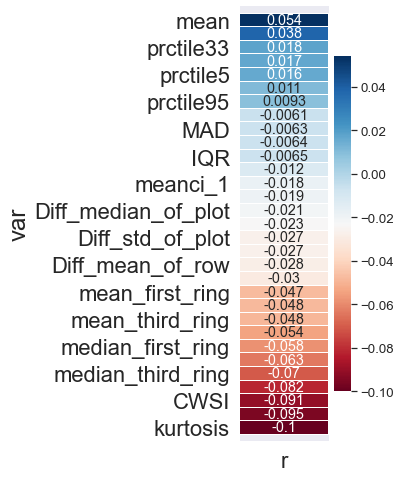

In [12]:
fix,ax = plt.subplots(figsize=(2,8))
sns.set(font_scale=1.2)
sns.heatmap(spearmanr,vmax=0.054,vmin=-0.1,linewidths=0.005,annot=True,linecolor="white", cmap='RdBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()


## partial Spearman Correlation

In [13]:
def partial_spearman(data,predictors):
    import pingouin as pg

    All_spearman_pcorr = pd.DataFrame()
    for i in data[predictors].columns:
        covar_pre = predictors.copy()
        spearman_pcorr = pg.partial_corr(data = data,x=i,y= 'Y', method = 'spearman',covar=covar_pre.remove(i))
        spearman_pcorr['X'] = i
        All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
    All_spearman_pcorr = All_spearman_pcorr.reset_index().drop(['index'], axis=1)
    All_spearman_pcorr['r_abs']=All_spearman_pcorr.r.abs()
    All_spearman_pcorr['p-val']<=0.05 #just IQR is not stat sig
    All_spearman_pcorr = All_spearman_pcorr.sort_values(by=['r_abs'])
    partial_spearman= All_spearman_pcorr[['X','r','r_abs']].copy(True)
    partial_spearman = partial_spearman.sort_values(by=['r'],ascending=False).set_index('X').rename(columns={"r": "r partial"})
    return partial_spearman

In [14]:
partial_spearman_sdeDavid = partial_spearman(df_out,predictors)[['r_abs']].rename(columns={"r_abs": "|r| sdeDavid"})
r_abs_all_datasets = pd.concat([partial_spearman_sdeDavid],axis=1).sort_values(by=['|r| sdeDavid'],ascending=False)

<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append m

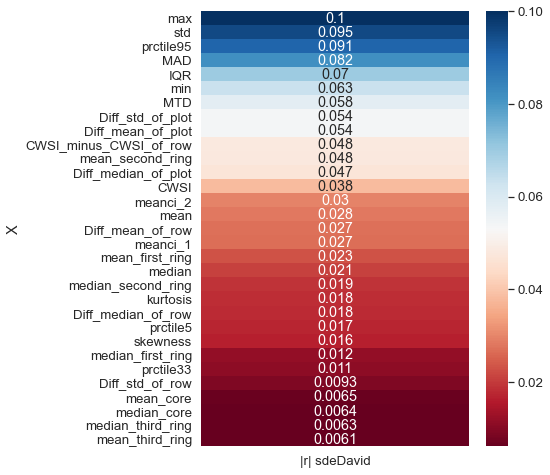

In [15]:
fix,ax = plt.subplots(figsize=(6,8))
sns.set(font_scale=1.2)
sns.heatmap(r_abs_all_datasets,vmax=0.1,vmin=0.0061,linewidths=0,annot=True,linecolor="white",cmap='RdBu')
bottom,top=ax.get_ylim()
plt.show()

In [17]:
All_spearman = partial_spearman(df_out,predictors).rename(columns={"r_abs": "|r| partial","r": "r partial"})
All_spearman = pd.concat([All_spearman,spearmanr],axis=1)
All_spearman['|r|']=All_spearman['r'].abs()


<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
<ipython-input-13-67c4b49ddbbc>:9: FutureWarning: The frame.append m

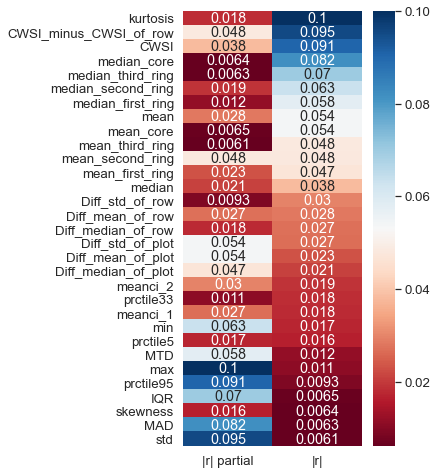

In [18]:
fix,ax = plt.subplots(figsize=(4,8))
sns.set(font_scale=1.2)
All_spearman =All_spearman.sort_values(by=['|r|'],ascending=False)
sns.heatmap(All_spearman[['|r| partial','|r|']],vmax=0.1,vmin=0.0061,
            linewidths=0,annot=True,
            linecolor="white", cmap='RdBu')
bottom,top=ax.get_ylim()
# ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

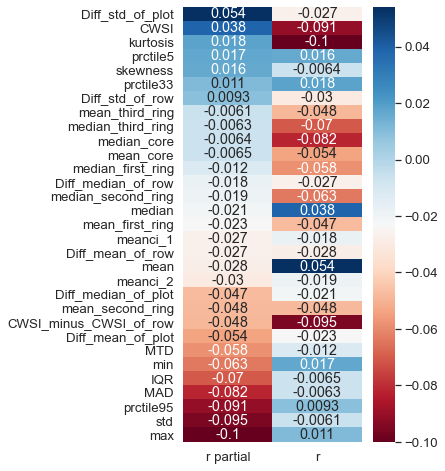

In [20]:
fix,ax = plt.subplots(figsize=(4,8))
sns.set(font_scale=1.2)
All_spearman =All_spearman.sort_values(by=['r partial'],ascending=False)
sns.heatmap(All_spearman[['r partial','r']],vmax=0.054,vmin=-0.1,
            linewidths=0,annot=True,
            linecolor="white", cmap='RdBu')
bottom,top=ax.get_ylim()
# ax.set_ylim(bottom+0.5,top-0.5)
plt.show()


### Elimination of highly correlated features that were less correlat with Y

In [24]:

describe= df_out[['min','max','mean',
       'median','MTD','std','IQR',
       'MAD','prctile5','prctile95',
       'prctile33','meanci_1','meanci_2',
      'skewness','kurtosis',
       'Diff_median_of_plot','Diff_mean_of_plot',
      'Diff_std_of_plot',
       'Diff_median_of_row','Diff_mean_of_row',
      'Diff_std_of_row','CWSI','CWSI_minus_CWSI_of_row',
       'mean_first_ring','median_first_ring',
       'mean_second_ring','median_second_ring',
      'mean_third_ring','median_third_ring',
      'mean_core','median_core']].describe(include='all').T

describe['range']=describe['min'].map('{:,.2f}'.format).astype(str)+','+describe['max'].map('{:,.2f}'.format).astype(str)
describe['range']

Type                          nan,nan
Plot                          nan,nan
Site_Name                     nan,nan
mean                        2.24,5.96
min                        -1.06,3.33
prctile5                    0.36,3.70
max                       12.31,15.02
prctile95                  6.92,11.34
std                         1.80,2.72
MTD                       10.53,14.16
median                      1.31,5.33
skewness                    1.38,2.75
kurtosis                   4.31,11.10
IQR                         0.83,2.84
MAD                         1.15,1.99
meanci_1                    2.13,5.84
meanci_2                    2.35,6.08
Diff_median_of_plot        -1.71,1.32
Diff_mean_of_plot          -1.56,1.08
Diff_std_of_plot           -0.36,0.51
Diff_median_of_row         -1.63,1.38
Diff_mean_of_row           -1.44,1.17
Diff_std_of_row            -0.37,0.54
prctile33                   0.72,4.16
mean_first_ring             2.25,6.48
mean_second_ring            1.30,5.89
mean_third_r

In [176]:
eliminated_pred = var_to_remove.keys()
#eliminated_pred_FORREAL = ['mean','prctile33','max',
#                     'skewness','MTD','Diff_median_of_plot',
#                     'Diff_median_of_row','mean_first_ring',
#                     'mean_second_ring','mean_third_ring','mean_core']
DataNew = df_out.drop(eliminated_pred, axis=1).copy(True)
predictors = ['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row','kurtosis']
predictors_new = [ele for ele in predictors if ele not in eliminated_pred]
print(predictors_new)

['mean', 'median', 'min', 'prctile5', 'prctile95', 'std', 'MAD', 'skewness', 'MTD', 'meanci_1', 'meanci_2', 'Diff_mean_of_plot', 'Diff_std_of_plot', 'Diff_median_of_row', 'Diff_std_of_row', 'mean_first_ring', 'mean_second_ring', 'mean_third_ring', 'mean_core', 'CWSI', 'CWSI_minus_CWSI_of_row']


### Exmine VIF after feature elimination

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
#X = DataNew[predictors_new]
X = df_out[['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row','kurtosis']]
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
#print(f"Decimal Representation: {vif_data["VIF"][0]:.7f}")
print(vif_data.sort_values(by = 'VIF', axis = 0, ascending=False, inplace=False))


C:\Users\Stav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                   feature           VIF
13                meanci_2           inf
12                meanci_1  9.007199e+15
3                      min  2.251800e+15
5                      max  1.000800e+15
0                     mean  6.928615e+14
11                     MTD  6.004800e+14
1                   median  2.742351e+06
7                      std  1.627350e+05
14     Diff_median_of_plot  8.646360e+04
15       Diff_mean_of_plot  7.830694e+04
2                prctile33  3.500123e+04
8                      MAD  3.133548e+04
9                 skewness  1.853538e+04
6                prctile95  6.754012e+03
30                kurtosis  6.461980e+03
4                 prctile5  1.577538e+03
23               mean_core  1.167951e+03
10                     IQR  1.063463e+03
16        Diff_std_of_plot  1.034231e+03
27             median_core  9.941865e+02
20         mean_first_ring  6.939879e+02
24       median_first_ring  6.114682e+02
25      median_second_ring  5.119248e+02
26       median_